<br><h1 align="Center"> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="60" width="200" align="Center" />MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II</h1>
<h2 align="Center">
Presentado por:<br>
Fabián Cholo Acevedo - Cód 201523509<br>
Jaime Orjuela Viracacha - Cód 201924252<br>
</h2>

## Red neuronal sencilla

## Actividad 3

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)


En este cuaderno continuaremos con nuestra aproximación a las redes neuronales de la mano con la clasificación de imagenes. Generalizaremos nuestra implementación de un perceptrón para que la red considere una agrupación de neuronas. Como se demuestra en "Multilayer Feedforward Networks are Universal Approximators" (K. Hornik, M. Stinchcombe & H. White, 1989, *Neural Networks* Vol. 2, 359-366), una red neuronal sencilla (con una única capa escondida y con un número suficiente de neuronas) es un tipo de *aproximador universal*, capaz de aproximar cierto tipo de funciones a cualquier nivel de precisión. 

## Actividad en grupos
### Nombres:

**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.



## 1. Construcción de una red neuronal sencilla

En esta actividad podremos ver la diferencia de un modelo con una sola neurona (replicando la regresión logística en cuanto su función de activación sea la *sigmoide*) que vimos en la actividad anterior,  y uno con múltiples neuronas dentro de una sola capa escondida. 

De esta manera, implementaremos una red neuronal con una capa escondida para un problema de clasificación binario. Usaremos múltiples neuronas con una función de activación no-lineal, como por ejemplo la función de tangente hiperbólica (tanh), y calcularemos la función de pérdida de entropía cruzada. Finalmente implementaremos la propagación hacia delante y hacia atrás con el fin de estimar los parámetros del modelo iterativamente por medio del algoritmo de descenso en la dirección del gradiente (GD).



A continuación llamamos los paquetes que vamos a utilizar:

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

## 2 - Conjunto de datos ##

Primero, cargamos el conjunto de datos sobre el que se va a trabajar. El siguiente código va a cargar un conjunto de datos `X` e `Y` donde `Y`es una variable binaria.

In [2]:
def datos_nl(semilla,m):
    N = int(m/2) # numero de puntos por clase
    D = 2 # dimensionalidad
    X = np.zeros((m,D)) # matriz de datos donde cada fila es un unico ejemplo
    Y = np.zeros((m,1), dtype='uint8') # vector de etiquetas (0 para rojo, y 1 para azul)
    a = 4 # trazado maximo de la flor

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radio
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

Visualizamos los datos mediante matplotlib. Los datos tienen puntos rojos (y=0) y azules (y=1). El objetivo es el de constuir un modelo que se ajuste a estos datos. 

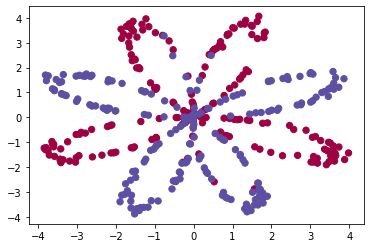

In [3]:
semilla=np.random.seed(66)
m = 400 # numero de ejemplos
X, Y = datos_nl(semilla,m)

# Visualizamos los datos:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral)

Tenemos una matriz $X$ con los patrones ($X_1$, $X_2$), y un vector $Y$ con las etiquetas ($0=$*rojo*, $1=$*azul*).

Examinemos los datos a continuación.

### Ejercicio 2.1

Cuántos ejemplos de entrenamiento tenemos? O cuáles son las dimensiones (`shape`) de `X` e `Y`? 

**Ayuda**: Recuerde cómo obtener la forma de un arreglo numpy [(ayuda)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [4]:
#Dimensión de la matriz que contiene las coordenadas de los puntos a analizar
X.shape

(2, 400)

In [5]:
#Dimensión de la matriz (vector columna) que contiene las etiquetas de los puntos a analizar (0=rojo, 1= azul)
Y.shape

(1, 400)

In [6]:
#número de casos o ejemplos
m

400

In [7]:
dim_X = X.shape
dim_Y = Y.shape
# m tamaño del conjunto de entrenamiento

print ('Las dimensiones de X son: ' + str(dim_X))
print ('Las dimensiones de Y son: ' + str(dim_Y))
print ('Hay m = %d ejemplos de entrenamiento' % (m))

Las dimensiones de X son: (2, 400)
Las dimensiones de Y son: (1, 400)
Hay m = 400 ejemplos de entrenamiento


**Salida esperada**: 
       
<table style="width:40%">
<tr>
<td>Dimensiones de X</td>
<td> (2, 400) </td> 
</tr>
<tr>
<td>Dimensiones de Y</td>
<td>(1, 400) </td> 
</tr>
<tr>
<td>m</td>
<td> 400 </td> 
</tr>
</table>

## 3 - Regresión Logística

Antes de contruir una red neuronal, primero estudiemos cómo se comporta la regresión logística con este problema. Podemos utilizar las funciones de sklearn para hacerlo. Ejecute el siguiente código para entrenar un clasificador de regresión logística sobre el conjunto de datos.

In [8]:
# Entrene el clasificador logístico
clf = sklearn.linear_model.LogisticRegressionCV(cv=5)

Y2=np.squeeze(Y) # Remove single-dimensional entries from the shape of an array.
clf.fit(X.T, Y2)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [9]:
Y2.shape

(400,)

Ahora se puede graficar la frontera de decisión para este modelo de acuerdo con la siguiente funcion: 

In [10]:
def plot_frontera_decision(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # grilla de puntos a una distancia h entre ellos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # predice el valor de la funcion para toda la grilla
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # grafica el contorno y los ejemplos de entrenamiento
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

Podemos ver la frontera de decisión mediante el siguiente código:

Exactitud de la regresión logística: 49 % (porcentaje de puntos correctamente etiquetados)


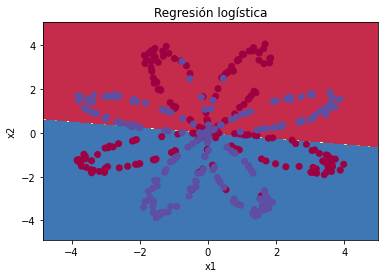

In [11]:
# Grafique la frontera de decisión para la regresión logística
plot_frontera_decision(lambda x: clf.predict(x), X, Y2)
plt.title("Regresión logística")

# Exactitud
LR_predictions = clf.predict(X.T)
print ('Exactitud de la regresión logística: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(porcentaje de puntos correctamente etiquetados)")

**Salida esperada**: 

<table style="width:20%">
<tr>
<td> 
Exactitud
</td>
<td> 49% </td> 
</tr>
  
</table>

**Discusión**: como se esperaba, el conjunto de datos no es linealmente separable. Por esto, la regresión logística no logra un buen desempeño. Pero la red neuronal sí que debería lograr un mejor desempeño.  

**R**: el comportamiento de los datos hace que la regresión logistica no sea un modelo eficiente para clasificar la información analizada.


## 4 - Modelo de red neuronal

La regresión logística no logró buenos resultados sobre el conjunto de datos. Por lo tanto, ahora vamos a entrenar una red neuronal con una sola capa escondida.

**Formulación matemática**:

Para un ejemplo $x^{(i)}$:

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 

$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$

$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$

$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$

$$y^{(i)}_{prediccion} = \begin{cases} 1 & \mbox{si } a^{[2](i)} > 0.5 \\ 0 & \mbox{en caso contrario (e.c.c.) } \end{cases}\tag{5}$$

Dadas las predicciones sobre todos los ejemplos, computamos el coste $L$ de acuerdo con la función de entropía cruzada: 
$$L = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Recuerde**: La metodología general para construir una red neuronal:
1. Definir una estructura de red neuronal ( Tamaño del input,  # de neuronas/unidades de decisión escondidas)
2. Inicializar los parámetros del modelo
3. Bucle:
   - Implementar propagación hacia delante
   - Computar la pérdida
   - Implementar la propagación hacia atrás mediante los gradientes
   - Actualizar los parámetros (Descenso en la dirección del gradiente: GD)

Se pueden construir funciones auxiliares para computar los pasos 1-3 y luego fusionarlas en una función global llamada `modelo_red()`. Una vez construida `modelo_red()` y habiendo aprendido los parámetros adecuados, se pueden hacer predicciones sobre nuevos datos.

### 4.1 - Definiendo la estructura de la red neuronal ####

### Ejercicio 4.1
Defina tres variables:
    - n_x: tamaño de la capa de entrada
    - n_h: tamaño de la capa oculta 
    - n_y: tamaño de la capa de salida

Podemos utilizar las dimensiones de $X$ e $Y$ para encontrar $n_x$ y $n_y$. 

In [12]:
def dim_capas(X, Y, num_neuronas):
    
    #Input:
    #X: conjunto de datos de entrada, con dimensines (tamaño del input, número de ejemplos)
    #Y: etiquetas (tamaño del output, número de ejemplos)
    
    #Output:
    #n_x: tamaño de la capa de entrada
    #n_h: tamaño de la capa escondida
    #n_y: tamaño de la capa de salida
    
    # tamaño de la capa de entrada
    n_x = X.shape[0] 
    
    # número de neuronas en la capa escondida / tamaño de la capa oculta 
    
    n_h = X.shape[0] + Y.shape[0] +1  #CONFIRMAR CALCULO 
    
    # tamaño de la acapa de salida
    n_y = Y.shape[0]     

    return (n_x, n_h, n_y)

In [13]:
num_neuronas = 4

(n_x, n_h, n_y) = dim_capas(X, Y, num_neuronas)
print("El tamaño de la capa de entrada es: n_x = " + str(n_x))
print("El tamaño de la capa de escondida es: n_h = " + str(n_h))
print("El tamaño de la capa de salida es: n_y = " + str(n_y))

El tamaño de la capa de entrada es: n_x = 2
El tamaño de la capa de escondida es: n_h = 4
El tamaño de la capa de salida es: n_y = 1


**Salida esperada**:  tenga en cuenta que esta comprobación es sólo para verificar que la función que ha programado es correcta. En la implementación de la red utilizaremos otras dimensiones.


<table style="width:20%">
<tr>
<td>n_x</td>
<td> 2 </td> 
</tr>
<tr>
<td>n_h</td>
<td> 4 </td> 
</tr>
<tr>
<td>n_y</td>
<td> 1 </td> 
</tr>
</table>

### 4.2 - Inicialización de los parámetros del modelo 

### Ejercicio 4.2

Ahora vamos a implementar la función `param_I()`.

**Paso a paso**:
- Debemos asegurarnos de que las dimensiones de los parámetros sean las correctas. 
- Inicializamos los pesos con valores aleatorios. 
    - Usamos `np.random.randn(a,b) * 0.01` para esta inicialización aleatoria de una matriz de dimensiones (a,b).
- Inicializamos los vectores de sesgo con ceros. 
    - Usamos `np.zeros((a,b))` para la inicialización con ceros de la matriz de tamaño (a,b).

In [14]:

def param_I(n_x, n_h, n_y, semilla):
    """
    Input:
    n_x: tamaño de la capa de entrada
    n_h: tamaño de la capa escondida
    n_y: tamaño de la capa de salida
    Output:
    param: diccionario python con los parámetros:
            W1: matriz de pesos con dimensiones (n_h, n_x)
            b1: matriz de sesgos con dimensiones (n_h, 1)
            W2: matriz de pesos con dimensiones (n_y, n_h)
            b2: matriz de sesgos con dimensiones (n_y, 1)
    """
    np.random.seed(semilla)
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    param = {"W1": W1,
             "b1": b1,
             "W2": W2,
             "b2": b2}
    
    return param

In [15]:
param = param_I(n_x, n_h, n_y, semilla=2)
print("W1 = " + str(param["W1"]))
print("b1 = " + str(param["b1"]))
print("W2 = " + str(param["W2"]))
print("b2 = " + str(param["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Salida esperada**: 

<table style="width:80%">
<tr>
<td>W</td>
<td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
</tr>
<tr>
<td>b1</td>
<td> [[0.]
 [0.]
 [0.]
 [0.]] </td> 
<tr>
<td>W2</td>
<td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]] </td> 
</tr>
<tr>
<td>b2</td>
<td> [[ 0.]] </td> 
</tr>
</table>

### 4.3 - El bucle ####

### Propagación hacia delante

### Ejercicio 4.3.1 
Implemente la propagación hacia delante `propagacion()`.

Ayuda: Puede usar la función `sigmoide()` que ya hemos programado anteriormente y la función `np.tanh()` (es parte de la biblioteca numpy).

- Los pasos que debe implementar son:
  1. Recupere cada parámetro del diccionario "param" (que es la salida de `param_I()`), utilizando `param[".."]`.
  2. Implemente la propagación hacia delante. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ y $A^{[2]}$ (el vector de todas sus predicciones sobre todos los ejemplos del conjunto de entrenamiento).
  
- Los valores necesarios para calcular la retro-propagación son guardados en "`memo`". Esta `memo` será proporcionada como entrada a la función de retro-propagación.

In [16]:
def sigmoide(x):

    s = 1/(1+np.exp(-x))
    return s


In [69]:
def propagacion(X, param, fx_activacion):
    """
    Input: 
    X: datos de entrada de tamaño (n_x, m)
    param: diccionario python con los parameters (salida de la funcion de inicialización)
    
    fx_activacion: con miras a optimizar la solución 4.5.5, se añade un parametro llamado fx_activacion
    para establecer la función de activación de la capa de salida en sigmoide o ReLU
    
    Output:
    A2: la salida de la función sigmoide de la segunda activación
    memo: un diccionario conteniendo "Z1", "A1", "Z2" y "A2"
    """
    # Recupera cada parámetro del diccionario "param"
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    
    # Implemente la propagación hacia delante para calcular las probabilidades A2 
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    
    if fx_activacion == "sigmoide":
        A2 = sigmoide(Z2)
    elif fx_activacion == "relu":
        A2 = np.maximum(0,Z2) # <-- ReLU
    elif fx_activacion == "tanh":
        A2 = np.tanh(Z2) #<--- Tanh
    
    assert(A2.shape == (1, X.shape[1]))
    
    memo = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, memo

In [24]:
A2, memo = propagacion(X, param, "sigmoide")

print(np.mean(memo['Z1']) ,np.mean(memo['A1']),np.mean(memo['Z2']),np.mean(memo['A2']))

0.00037565897779137365 0.0003758473221044305 2.5338411787229066e-08 0.5000000063347811


###### **Salida esperada**: 
<table style="width:90%">
<tr>
<td> 0.0003756589777913734 0.00037584732210443054 2.533841178721172e-08 0.5000000063347811
</td> 
</tr>
</table>

Se confirma que la salida obtenida concuerda con el valor esperado

### Función de pérdida

Ahora que ya hemos calculado $A^{[2]}$ (en la variable Python "`A2`"), con los valores  $a^{[2](i)}$ para cada ejemplo ($i$) podemos computar la función de coste:

$$L = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{7}$$

### Ejercicio 4.3.2
Implemente la función `perdida()` para calcular el valor de la pérdida $L$.


*Ayuda:*
Por ejemplo, la expresión $$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$$ se puede implementar de la siguiente manera:
```python
logprobs = np.multiply(np.log(A2),Y)
coste = - np.sum(logprobs)                
```
Puede usar tanto `np.multiply()` y luego `np.sum()`, como también `np.dot()`.


In [25]:

def perdida(A2, Y):
    """
    Computa la función de pérdida de entropía cruzada de la ecuación
    Input:
    A2: la salida de la función sigmoide para la segunda activación, de tamaño (1, numero de ejemplos)
    Y: vector de etiquetas de tamaño (1, numero de ejemplos)
    param: diccionario python con los parametros W1, b1, W2 and b2
    Ouput:
    coste: coste de entropía cruzada 
    """
    
    m = Y.shape[1]   # numero de ejemplos

    # Coste de entropía cruzada
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
    coste = -1/m * np.sum(logprobs) # no hay necesidad de usar un bucle!
    
    coste = np.squeeze(coste)  # se asegura que el coste sea de la dimension esperada, e.g. un [[99]] lo torna en 99 
    assert(isinstance(coste, float))
    
    return coste

In [26]:
print("coste = " + str(perdida(A2, Y)))

coste = 0.6930274319338173


**Salida esperada**: 
<table style="width:40%">
<tr>
<td>coste</td>
<td> 0.6930274319338173 </td> 
</tr>
</table>

Se verifica que el resultado obtenido concuerda con el valor esperado

### Retro-propagación

Ahora vamos a implementar el concepto más más importante de una red neuronal. Utilizando la memoria (`memo`) computada en la propagacion hacia delante, podemos implementar la propagación hacia atrás. Este paso nos permitirá actualizar la estimación de nuestros parámetros, es decir, paso a paso ir *aprendiendo* la frontera de decisión de acuerdo con los ejemplos de entrenamiento.

### Ejercicio 4.3.3

Implemente la función `retro()` para la **retro-propagación del error**

La retro-propagación suele ser la parte más difícil para la construcción de una red neuronal. Recordemos lo que es la retro-propagación. Se deben utilizar las seis ecuaciones siguientes


$\frac{\partial L }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})\tag{8}$

$\frac{\partial L }{ \partial W_2 } = \frac{\partial L }{ \partial z_{2}^{(i)} } a^{[1] (i) T} \tag{9}$

$\frac{\partial L }{ \partial b_2 } = \sum_i{\frac{\partial L }{ \partial z_{2}^{(i)}}}\tag{10}$

$\frac{\partial L }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial L }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2})\tag{11} $

$\frac{\partial L}{ \partial W_1 } = \frac{\partial L }{ \partial z_{1}^{(i)} }  X^T \tag{12}$

$\frac{\partial L }{ \partial b_1 } = \sum_i{\frac{\partial L }{ \partial z_{1}^{(i)}}} \tag{13}$

- Nótese que $*$ denota multiplicación por cada elemento.
- En el código utilizamos la siguiente notación:
    - dW1 = $\frac{\partial L }{ \partial W_1 }$
    - db1 = $\frac{\partial L }{ \partial b_1 }$
    - dW2 = $\frac{\partial L }{ \partial W_2 }$
    - db2 = $\frac{\partial L }{ \partial b_2 }$
    


- Ayuda:
    - Para computar dZ1 se debe calcular primero $g^{[1]'}(Z^{[1]})$. Como $g^{[1]}(.)$ es la función de activación tanh, si $a = g^{[1]}(z)$ entonces $g^{[1]'}(z) = 1-a^2$. Para mayores detalles puede ver: https://socratic.org/questions/what-is-the-derivative-of-tanh-x
    - Entonces puede calcular 
    $g^{[1]'}(Z^{[1]})$ utilizando `(1 - np.power(A1, 2))`.
    - Tenga en cuenta las dimensiones correctas para la implementación de la propagación hacia atrás en el cálculo de $db$. Por ejemplo, para $db1$, si quiere sumar las columnas (filas), $axis=1$ ($axis=0$).
    - También tenga en cuenta que las dimensiones se pueden manetener fijas mediante el argumento $keepdims=True$.

In [27]:
def retro(param, memo, X, Y):
    """
    Implementa la retro-propagación del error
    Input:
    param: diccionario python con los parameteros 
    memo: un diccionario con "Z1", "A1", "Z2" y "A2".
    X: datos de entrada  
    Y: vector de etiquetas 
    Output:
    grads: diccionario python con los gradientes de los diferentes parametros
    """
    m = X.shape[1]     # numero de ejemplos en X
    
    # Recuperamos los pesos W1 y W2 del diccionario "param".
    W1 = param["W1"]
    W2 = param["W2"]
        
    # Recuperamos A1 y A2 del diccionario "memo".
    A1 = memo["A1"]
    A2 = memo["A2"]
    
    # Retro-propagacion: calcula dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m* np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [28]:
grads = retro(param, memo, X, Y2)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-0.00022872 -0.00278702]
 [-0.00018844 -0.00238845]
 [ 0.00012072  0.00145306]
 [ 0.00049226  0.00602335]]
db1 = [[ 1.02430069e-08]
 [ 2.36592378e-07]
 [-1.30321698e-07]
 [-1.50321903e-07]]
dW2 = [[-0.00023831  0.00386166 -0.00260686 -0.00316916]]
db2 = [[6.33478109e-09]]


**Salida esperada**: 

<table style="width:80%">
<tr>
<td>dW1</td>
<td> [[-0.00022872 -0.00278702]
 [-0.00018844 -0.00238845]
 [ 0.00012072  0.00145306]
 [ 0.00049226  0.00602335]] </td> 
</tr>
<tr>
<td>db1</td>
<td>  [[ 1.02430069e-08]
 [ 2.36592378e-07]
 [-1.30321698e-07]
 [-1.50321903e-07]] </td> 
</tr>
<tr>
<td>dW2</td>
<td> [[-0.00023831  0.00386166 -0.00260686 -0.00316916]] </td> 
</tr>
<tr>
<td>db2</td>
<td> [[6.33478109e-09]] </td> 
</tr>
</table>  

Se confirma que el resultado obtenido concuerda con el valor esperado

### Actualización de parámetros

### Ejercicio 4.3.4

Implementamos la regla de actualización de nuestros estimadores dentro del GD. Usamos el método GD. Debe usar (dW1, db1, dW2, db2) para actualizar (W1, b1, W2, b2).


*Ayuda:* La regla general del GD consiste en definir $ \hat \theta_{nuevo} = \hat \theta_{viejo} - \alpha \frac{\partial L }{ \partial \hat \theta_{viejo} }$ donde $\alpha$ es la tasa de aprendizaje y $\theta$ representa un parámetro.




In [29]:

def rev_param(param, grads, tasa):
    """
    Actualice los parametros usando la regla de actualización del GD
    Input:
    param: diccionario python con los parametros 
    grads: diccionario python con los gradientes 
    Output:
    param: diccionario python con los parametros actualizados 
    """
    # Los parametros del diccionario "param"
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    
    # Los gradientes del diccionario "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Regla de actualización para cada parametro
    W1 = W1 - tasa * dW1
    b1 = b1 - tasa * db1
    W2 = W2 - tasa * dW2
    b2 = b2 - tasa * db2
    
    param = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return param

In [30]:
param = rev_param(param, grads, tasa=1.2)

print("W1 = " + str(param["W1"]))
print("b1 = " + str(param["b1"]))
print("W2 = " + str(param["W2"]))
print("b2 = " + str(param["b2"]))

W1 = [[-0.00389312  0.00278176]
 [-0.02113583  0.01926884]
 [-0.01807922 -0.01016114]
 [ 0.0044381  -0.0196809 ]]
b1 = [[-1.22916083e-08]
 [-2.83910854e-07]
 [ 1.56386037e-07]
 [ 1.80386284e-07]]
W2 = [[-0.01029355 -0.01372407  0.00864277  0.02672507]]
b2 = [[-7.60173731e-09]]


**Salida esperada**: 

<table style="width:80%">
<tr>
<td>W1</td>
<td> [[-0.00389312  0.00278176]
 [-0.02113583  0.01926884]
 [-0.01807922 -0.01016114]
 [ 0.0044381  -0.0196809 ]]</td> 
</tr>
<tr>
<td>b1</td>
<td> [[-1.22916083e-08]
 [-2.83910854e-07]
 [ 1.56386037e-07]
 [ 1.80386284e-07]]</td> 
</tr>
<tr>
<td>W2</td>
<td> [[-0.01029355 -0.01372407  0.00864277  0.02672507]] </td> 
</tr>
<tr>
<td>b2</td>
<td> [[-7.60173731e-09]] </td> 
</tr>
</table>  

Se confirma que el resultado obtenido concuerda con el valor esperado.

### 4.4 - Combinacion de funciones

Ahora integramos las partes 4.1, 4.2 y 4.3 en modelo_red()

### Ejercicio
Construya su modelo de red neuronal en `modelo_red()`.

El modelo de la red debe usar las funciones previamente construidas en el orden correcto.

In [31]:
def modelo_red(X, Y, n_h, num_iter, tasa, print_c, semilla, fx_activacion):
    """
    Input:
    X: datos de entrada 
    Y: vector de etiquetas  
    n_h: tamaño de la capa escondida
    num_iter: numero de iteraciones del bucle del GD
    tasa: tasa de aprendizaje
    print_c: si "True", muestra el coste cada 1000 iteraciones
    semilla: semilla aleatoria
    Output:
    param: parametros aprendidos para el modelo final. Se utilizan para la predicción
    """

    n_x = dim_capas(X, Y,n_h)[0]
    n_y = dim_capas(X, Y,n_h)[2]
    
    # Inicializa los parámetros y carga W1, b1, W2, b2. 
    # Inputs: "n_x, n_h, n_y, semilla". Outputs = "W1, b1, W2, b2, parametros".
    param = param_I(n_x,n_h,n_y, semilla)
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    
    # Bucle (GD)
    for i in range(0, num_iter):
         
        # Propagación hacia delante. 
        # Inputs: "X, param". Outputs: "A2, memo".
        A2, memo = propagacion(X, param, fx_activacion)
        
        # Función de coste. 
        # Inputs: "A2, Y". Outputs: "coste".
        coste = perdida(A2,Y)
 
        # Retro-propagacion. 
        # Inputs: "param, memo, X, Y". Outputs: "grads".
        grads = retro(param,memo,X,Y)
 
        # Actualizacion de parametros por GD. 
        # Inputs: "param, grads, tasa". Outputs: "param".
        param = rev_param(param,grads, tasa)
            
        # Muestre el coste cada 1000 iteraciones
        if print_c and i % 1000 == 0:
            print ("Coste tras la iteración %i: %f" %(i, coste))
            
    return param

In [33]:
param = modelo_red(X, Y, n_h=4, num_iter=10000, tasa=2.5, print_c=True, semilla=0, fx_activacion="sigmoide")
print("W1 = " + str(param["W1"]))
print("b1 = " + str(param["b1"]))
print("W2 = " + str(param["W2"]))
print("b2 = " + str(param["b2"]))

Coste tras la iteración 0: 0.693165
Coste tras la iteración 1000: 0.212234
Coste tras la iteración 2000: 0.204699
Coste tras la iteración 3000: 0.202225
Coste tras la iteración 4000: 0.201530
Coste tras la iteración 5000: 0.201157
Coste tras la iteración 6000: 0.200892
Coste tras la iteración 7000: 0.200672
Coste tras la iteración 8000: 0.200473
Coste tras la iteración 9000: 0.200288
W1 = [[ 2.031501   -5.88151945]
 [ 8.20922949  9.54154855]
 [ 6.29285996 -7.35006989]
 [ 0.18184896 16.37654806]]
b1 = [[ 2.21381089]
 [ 0.11075809]
 [ 0.28745554]
 [-0.01307902]]
W2 = [[-1.4429921  -7.08128767  5.60224954  8.8998276 ]]
b2 = [[-0.03814567]]


**Salida esperada**: 

<table style="width:90%">
<tr> 
<td>  coste tras la iteracion 1000
</td>
<td> 0.212237
</td>
</tr>
<tr> 
<td> 
<center> $\vdots$ </center>
</td>
<td> 
<center> $\vdots$ </center>
</td>
</tr>
<tr>
<td>W1</td>
<td> [[ 2.03147148 -5.88139449]
 [ 8.20917502  9.54149218]
 [ 6.29283248 -7.35003994]
 [ 0.18185045 16.37644482]]</td> 
</tr>
<tr>
<td>b1</td>
<td> [[ 2.21377078]
 [ 0.11075722]
 [ 0.28745752]
 [-0.01307749]] </td> 
</tr>
<tr>
<td>W2</td>
<td> [[-1.44301402 -7.0813084   5.6022717   8.89984852]] </td> 
</tr>
<tr>
<td>b2</td>
<td> [[-0.03814504]] </td> 
</tr>
</table>  

### 4.5 Predicciones

Ahora que tenemos nuestro código completo para la implementación de una red de red neuronal sencilla, podemos utilizarlo para predecir la clase de nuevas observaciones. Pero antes debemos convertir las probabilidades de nuestro modelo en predicciones nítidas para asignar la clase. 

### Ejercicio 4.5.1
Especifique la funcion pred(), la cual haga uso de la propagacion hacia delante para predecir la clase.

La función que queremos implementar:

$y_{prediccion} = \begin{cases}
      1 & \text{si }\ activacion > 0.5 \\
      0 & \text{$e.c.c.$}
    \end{cases}$  

    
Como un ejemplo, si quiere fijar las entradas de una matriz de X a 0 y 1 basados en un $umbral$, se puede hacer de la siguiente manera: $$X_{nuevo} = (X > umbral)$$

In [34]:

def pred(param, X, fx_activacion):
    """
    Usando las estimaciones de los parámetros, predice una clase para cada ejemplo de X
    Input:
    param: diccionario python con los parametros 
    X: datos de entrada de tamaño (n_x, m)
    Output:
    prediccion: vector de predicciones para el modelo (rojo: 0 / azul: 1)
    """
    
    # Compute las probabilidades usando propagacion hacia delante, y clasifica a 0/1 usando 0.5 como umbral.
    A2, memo = propagacion(X, param, fx_activacion)
    prediccion = A2 > 0.5
    
    return prediccion

In [36]:
prediccion = pred(param, X, "sigmoide")
print("Predicción media = " + str(np.mean(prediccion)))

Predicción media = 0.5


**Salida esperada**: 

<table style="width:40%">
<tr>
<td>Predicción media</td>
<td> 0.5 </td> 
</tr>
</table>

Ahora podemos ejecutar el modelo y ver su desempeño sobre el conjunto de datos inicial. 

### Ejercicio 4.5.2
Ejecute el siguiente código para probar el modelo con una sola capa escondida de $n_h=10$ neuronas/unidades escondidas, 10000 iteraciones y una tasa de aprendizaje de 0.01.

Coste tras la iteración 0: 0.693149
Coste tras la iteración 1000: 0.677590
Coste tras la iteración 2000: 0.658924
Coste tras la iteración 3000: 0.635631
Coste tras la iteración 4000: 0.600104
Coste tras la iteración 5000: 0.579707
Coste tras la iteración 6000: 0.562551
Coste tras la iteración 7000: 0.498844
Coste tras la iteración 8000: 0.411819
Coste tras la iteración 9000: 0.361672


Text(0.5, 1.0, 'Frontera de decisión para una capa escondida de tamaño  10')

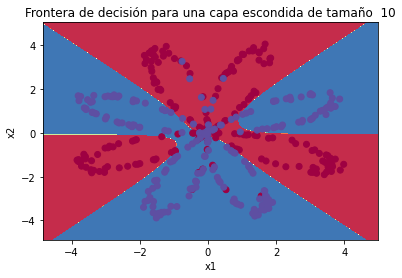

In [39]:
# Construya un modelo con una capa escondida de dimensión $n_h=10$
seed=39

n_h=10
param = modelo_red(X, Y, n_h, num_iter = 10000, tasa=0.01, print_c=True, semilla=seed, fx_activacion="sigmoide")

# Grafique la frontera de decisión
plot_frontera_decision(lambda x: pred(param, x.T, "sigmoide"), X, Y2)
plt.title("Frontera de decisión para una capa escondida de tamaño  " + str(n_h))

**Salida esperada**:

<table style="width:50%">
<tr> 
<td>Coste tras la iteración 9000</td>
<td> 0.361672 </td> 
</tr>
</table>

Veamos la EXACTITUD del modelo:

In [40]:
# Mostramos la exactitud
prediccion = pred(param, X, "sigmoide")
print ('Exactitud: %d' % float((np.dot(Y,prediccion.T) + np.dot(1-Y,1-prediccion.T))/float(Y.size)*100) + '%')

Exactitud: 90%


**Salida esperada**: 

<table style="width:35%">
<tr>
<td>Exactitud</td>
<td> 90% </td> 
</tr>
</table>

Ahora veamos la accuracy en prediccion con nuevos datos:

In [41]:
semilla=999  #tomamos una semilla distinta
m = 400 # numero de ejemplos

X_prueba, Y_prueba = datos_nl(semilla,m)

# Accuracy de prueba
pred_prueba = pred(param, X_prueba, "sigmoide")
print ('Exactitud: %d' % float((np.dot(Y_prueba,pred_prueba.T) + np.dot(1-Y_prueba,1-pred_prueba.T))/float(Y_prueba.size)*100) + '%')

Exactitud: 87%


**Salida esperada**: 

<table style="width:35%">
  <tr>
    <td>Exactitud</td>
    <td> 87% </td> 
  </tr>
</table>

La exactitud ($accuracy$) es alta comparada con los resultados de la regresión logística. El modelo de red neuronal sencilla ha aprendido a generalizar el comportameinto de $Y$ sobre los datos de la muestra. 

Hemos podido verificar que las redes neuronales pueden aprender fronteras de decisión en alto grado no-lineales, a diferencia de la regresión logística. 

Ahora, encontremos el mejor modelo al intentar distintos tamaños de la capa escondida.

### Ejercicio 4.5.3

Mediante un conjunto de posibles tamaños para la capa escondida (numero de neuronas en la capa escondida): num_neuronas = [1, 2, .. , H], encuentre el valor que logre el mejor ajuste sobre los datos de entrenamiento. 

Analize los distintos comportamientos del modelo para distintos tamaños de la capa escondida. 

Coste tras la iteración 0: 0.693146
Coste tras la iteración 1000: 0.609968
Coste tras la iteración 2000: 0.608201
Coste tras la iteración 3000: 0.607236
Coste tras la iteración 4000: 0.606594
Coste tras la iteración 5000: 0.606128
Coste tras la iteración 6000: 0.605774
Coste tras la iteración 7000: 0.605494
Coste tras la iteración 8000: 0.605268
Coste tras la iteración 9000: 0.605080
Exactitud para 1 unidades escondidas: 70.75 %
Coste tras la iteración 0: 0.693178
Coste tras la iteración 1000: 0.534976
Coste tras la iteración 2000: 0.531590
Coste tras la iteración 3000: 0.529949
Coste tras la iteración 4000: 0.528940
Coste tras la iteración 5000: 0.528250
Coste tras la iteración 6000: 0.527747
Coste tras la iteración 7000: 0.527363
Coste tras la iteración 8000: 0.527059
Coste tras la iteración 9000: 0.526813
Exactitud para 2 unidades escondidas: 69.75 %
Coste tras la iteración 0: 0.693207
Coste tras la iteración 1000: 0.228591
Coste tras la iteración 2000: 0.218436
Coste tras la iterac

Coste tras la iteración 1000: 0.215134
Coste tras la iteración 2000: 0.179609
Coste tras la iteración 3000: 0.156972
Coste tras la iteración 4000: 0.149707
Coste tras la iteración 5000: 0.144700
Coste tras la iteración 6000: 0.140943
Coste tras la iteración 7000: 0.138278
Coste tras la iteración 8000: 0.136012
Coste tras la iteración 9000: 0.133865
Exactitud para 20 unidades escondidas: 94.75 %


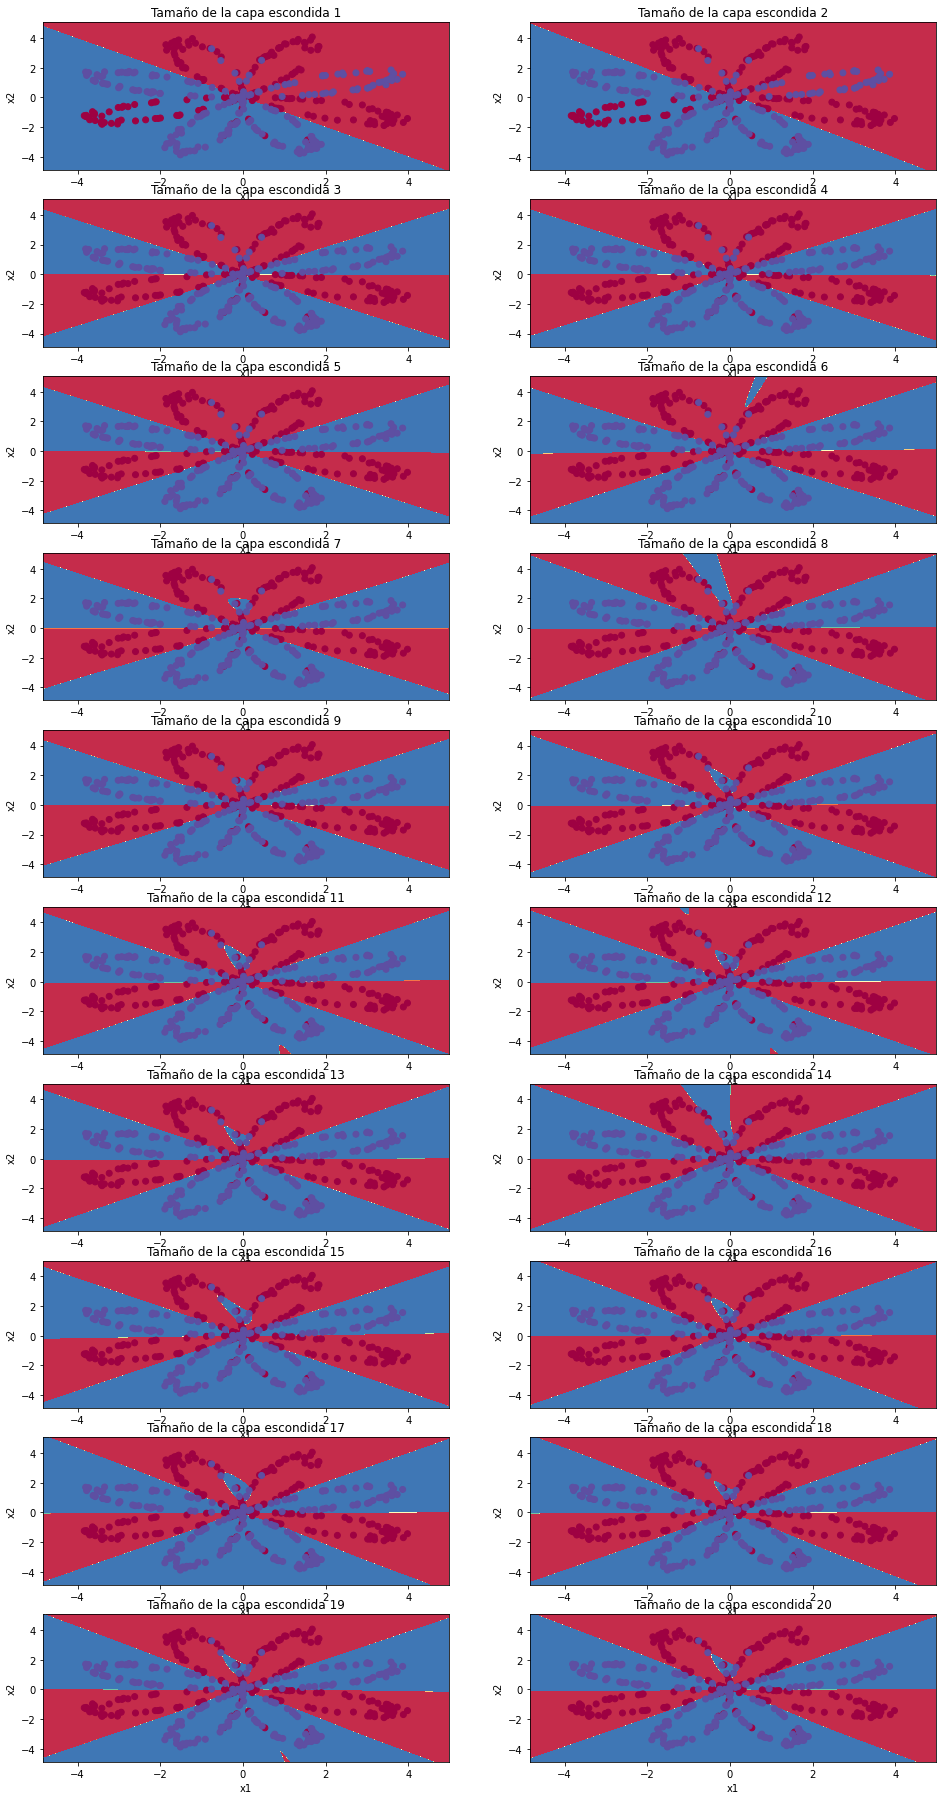

In [43]:
plt.figure(figsize=(16, 32))

num_neuronas = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]   #
Exactitudes = []

for i, n_h in enumerate(num_neuronas):
    plt.subplot(10, 2, i+1)
    plt.title('Tamaño de la capa escondida %d' % n_h)    
    param = modelo_red(X, Y, n_h, num_iter = 10000, tasa=1, print_c=True, semilla=13, fx_activacion="sigmoide")
    plot_frontera_decision(lambda x: pred(param, x.T, "sigmoide"), X, Y2)
    prediccion = pred(param, X, "sigmoide")
    Exactitud = float((np.dot(Y,prediccion.T) + np.dot(1-Y,1-prediccion.T))/float(Y.size)*100)
    Exactitudes.append(Exactitud) 
    print ("Exactitud para {} unidades escondidas: {} %".format(n_h, Exactitud))


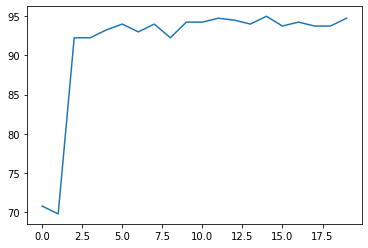

In [44]:
plt.plot(Exactitudes)

Considerando la gráfica anterior, se puede evidenciar que la Exactitud máxima se alcanza con 15 neuronas en la capa oculta, no obstante, con 41 y 42 se obtiene la misma exactitud, pero posiblemente se trata de un sobreajuste.

**Discusión**:
- Modelos más complejos (con más unidades escondidas) logran un mejor ajuste al conjunto de entrenamiento, hasta que eventualmente los modelos más grandes se *sobreajustan* a los datos. 

### Pregunta 4.5.4 

¿Cuál es la mejor configuración del modelo?

Recuerde: el mejor modelo es aquel que logre una mejor generalización de los datos. 



De acuerdo al análisis realizado en el punto anterior se encuentra un buen modelo con 1 capa de entrada, 1 capa oculta y una capa de salida, implementando 5 neuronas en la capa oculta, a partir de este número más que una buena generalización se tiene sobre-ajuste.

### Pregunta 4.5.5

¿Qué ocurre si cambiamos la función de activación en la capa de salida de sigmoide a ReLU?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/1280px-Rectifier_and_softplus_functions.svg.png" style="width:495px;height:360px;">


<img src="https://raw.githubusercontent.com/siebenrock/activation-functions/master/equations/rectified_linear_units.png">



<ipython-input-25-bcba200444bd>:15: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 0: nan
Coste tras la iteración 1000: 0.657694
Coste tras la iteración 2000: 0.656362
Coste tras la iteración 3000: 0.654719
Coste tras la iteración 4000: 0.647794
Coste tras la iteración 5000: nan
Coste tras la iteración 6000: nan
Coste tras la iteración 7000: nan
Coste tras la iteración 8000: 0.611371
Coste tras la iteración 9000: 0.610968
Exactitud para 1 unidades escondidas: 63.74999999999999 %
Coste tras la iteración 0: nan
Coste tras la iteración 1000: 0.545145
Coste tras la iteración 2000: 0.539939
Coste tras la iteración 3000: 0.537122
Coste tras la iteración 4000: 0.535262
Coste tras la iteración 5000: 0.533909
Coste tras la iteración 6000: 0.532863
Coste tras la iteración 7000: 0.532021
Coste tras la iteración 8000: 0.531324
Coste tras la iteración 9000: 0.530732
Exactitud para 2 unidades escondidas: 68.25 %
Coste tras la iteración 0: nan
Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan
Coste tras la iteración 3000: nan
Coste tras la 

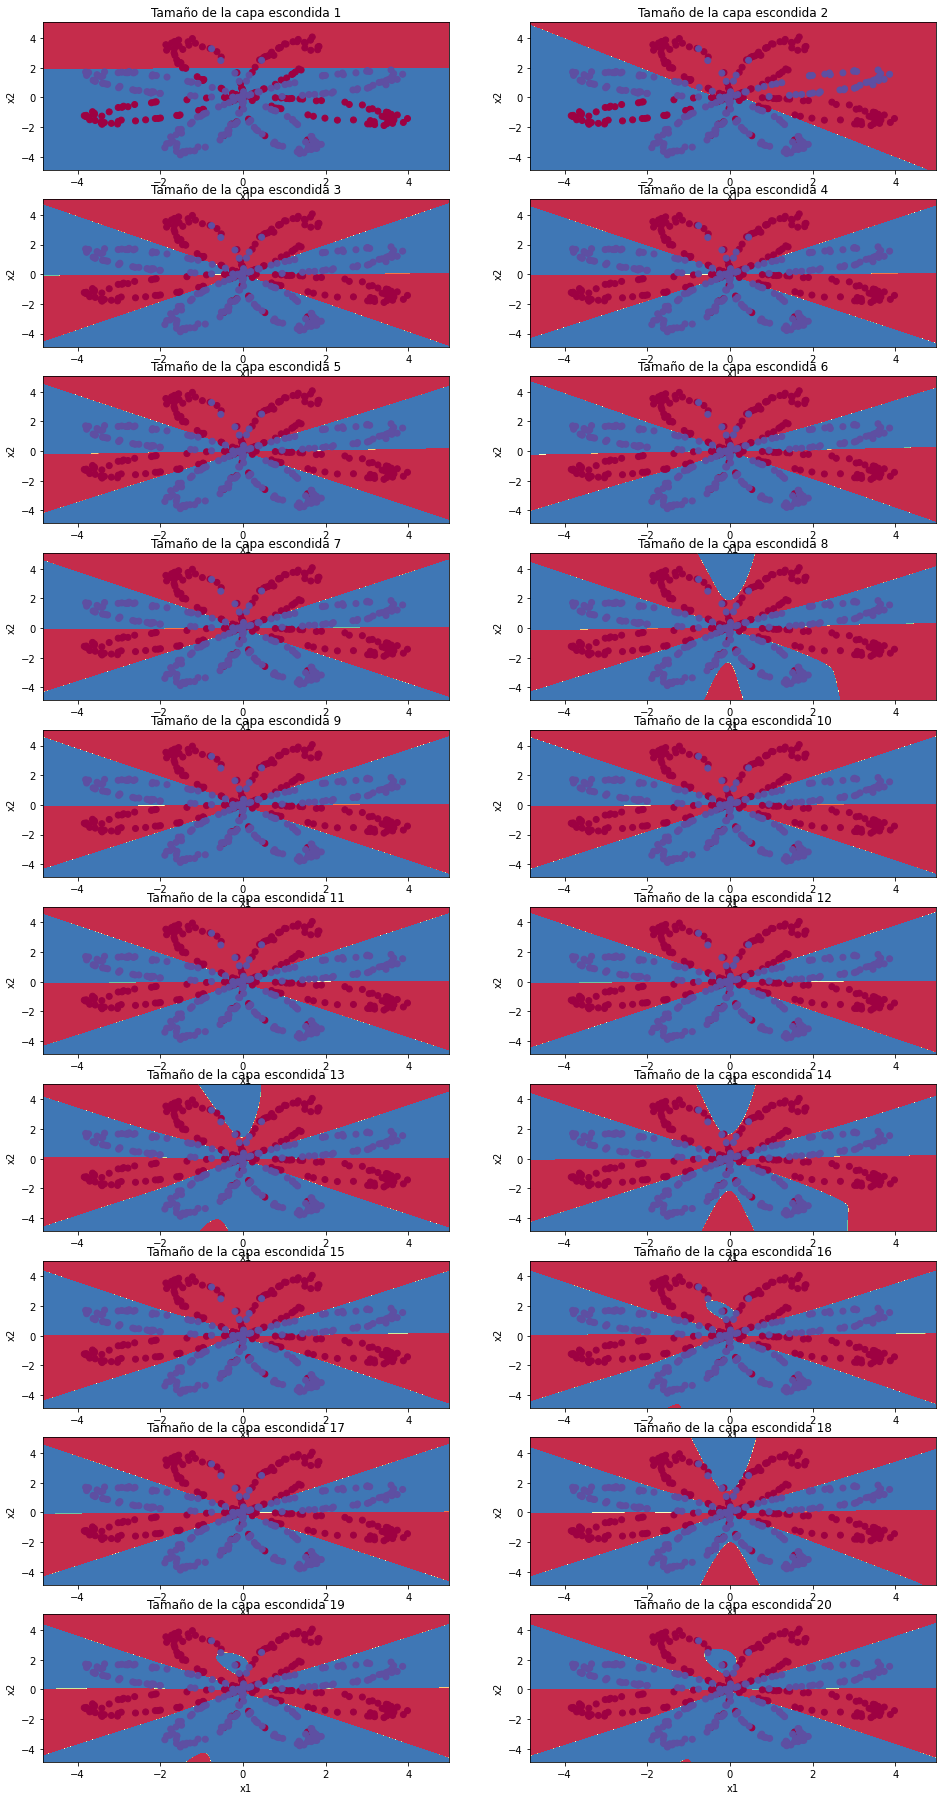

In [46]:
plt.figure(figsize=(16, 32))

num_neuronas = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]   #
Exactitudes = []

for i, n_h in enumerate(num_neuronas):
    plt.subplot(10, 2, i+1)
    plt.title('Tamaño de la capa escondida %d' % n_h)    
    param = modelo_red(X, Y, n_h, num_iter = 10000, tasa=1, print_c=True, semilla=13, fx_activacion="relu")
    plot_frontera_decision(lambda x: pred(param, x.T, "relu"), X, Y2)
    prediccion = pred(param, X, "relu")
    Exactitud = float((np.dot(Y,prediccion.T) + np.dot(1-Y,1-prediccion.T))/float(Y.size)*100)
    Exactitudes.append(Exactitud) 
    print ("Exactitud para {} unidades escondidas: {} %".format(n_h, Exactitud))


<strong>Conclusión:</strong> Modificando la función de activación de la capa de salida de una función sigmoide a una función ReLU, se observa inestabilidad dado que hay algunos valores que no se pueden determinar (NaN).  Esta inestabilidad puede ser causada dado que la función ReLU es más adecuada para tareas de regresión y no de clasificación como el que estamos analizando.

Felicitaciones, ha llegado al final de la actividad, estudiando en detalle conceptos clave para calibrar un modelo de red neuronal. Para finalizar, a continuación veamos un caso de estudio con imagenes. Vamos a probar una red neuronal sencilla para la deteccion automática de plantas nativas a partir de imagenes aereas del paramo de Chingaza y Cruz Verde.

Este caso de estudio hace parte de un proyecto de Ingeniería que busca preservar y monitorizar el ecosistema del páramo, de gran importancia por su potencial hídrico, mediante la propuesta de una metodología para la reconstrucción del ecosistema en zonas de baja densidad de poblaciones de la especia *Espeletia*. 

## 5. Caso aplicado

Construyamos una red sencilla para detectar automáticamente frailejones sobre imagenes aereas del páramo. 

A continuación, modifique el  código de ``modelo_red()``, en una nueva funcion llamada ``modelo_red2()``, que permita:

- Incluir una partición de los datos de entrada que contenga un conjunto de datos de entrenamiento y otro de validación. Los datos de validación deben contener información diferente a la de entrenamiento con el fin de evaluar el desempeño del modelo para generalizar datos desconocidos. 

- Recuperar la mejor época (iteración) para el modelo de acuerdo con su desempeño en validación

Luego implemente un código que permita identificar un *mejor* modelo de acuerdo con su desempeño en validación, el cual logre ajustar y generalizar los datos de entrenamiento lo mejor posible.

Una vez tengamos nuestro modelo lo podremos poner a prueba sobre una nueva imagen.


Escribamos nuestra nueva función:

In [52]:
def modelo_red2(X, Y, xV, yV, n_h, num_iter, tasa, semilla, print_c, fx_activacion):
    """
    Input:
    X: datos de entrada 
    Y: vector de etiquetas 
    xV: datos de validacion
    yV: etiquetas de validación
    n_h: tamaño de la capa escondida
    num_iter: numero de iteraciones del bucle del GD
    tasa: tasa de aprendizaje
    print_c: si "True", muestra el coste cada 1000 iteraciones
    semilla: semilla aleatoria para la inicializacion de los pesos
    Output:
    param: parametros aprendidos para el modelo final. Se utilizan para la predicción
    fx_activacion: función de activación de la capa de salida
    """

    n_x = np.shape(X)[0]
    n_y = np.shape(Y)[0] 
    
    costes = [] 
    costes2 = [] 
    coste_aux= 99
    epoc=0
    
    # Inicializa los parámetros y carga W1, b1, W2, b2. 
    # Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parametros".
    param = param_I(n_x, n_h, n_y, semilla)
    
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    
    # Bucle (GD)
    for i in range(0, num_iter):
         
        # Propagación hacia delante. 
        # Inputs: "X, param". Outputs: "A2, memo".
        A2, memo = propagacion(X, param, fx_activacion)
        A2V, memo2 = propagacion(xV, param, fx_activacion)                     # Propagacion hacia delante para la validacion
        
        # Función de perdida 
        # Inputs: "A2, Y". Outputs: "coste".
        coste = perdida(A2, Y) 
        
        # coste de validacion
        coste2 = perdida(A2V, yV)                         # Perdida para la validacion
 
        # Retro-propagacion. 
        # Inputs: "param, memo, X, Y". Outputs: "grads".
        grads = retro(param, memo, X, Y)
 
        # Actualizacion de parametros por GD. 
        # Inputs: "param, grads". Outputs: "param".
        param = rev_param(param, grads, tasa )
        
        # Muestre el coste cada 1000 iteraciones
        if print_c and i % 1000 == 0:
            print ("Coste tras la iteración %i: %f" %(i, coste))
        if print_c and i % 100 == 0:
            costes.append(coste)
            costes2.append(coste2)
            
            # Me quedo con la mejor época en validacion
        if coste2 < coste_aux:
            coste_aux=coste2
            epoc = i
                  
    # grafique el coste
    if print_c:
        plt.plot(np.squeeze(costes), marker="o", label="CE")
        plt.plot(np.squeeze(costes2), marker="*" , label="CV")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.ylabel('Coste')
        plt.xlabel('Epocas*100')
        plt.title("Tasa de aprendizaje= " + str(tasa))
        plt.savefig("fig1"+str(i)+".png")
        plt.show()
        print("Mejor iteracion es: " +str(epoc) +" con la semilla: " +str(semilla))

    return param, epoc

Carguemos los datos de las imagenes:

In [53]:
from ImportImagenes import *
from sklearn.model_selection import train_test_split

In [54]:
X,Y = import_imagenes()

CE_x, CV_x, CE_y, CV_y = train_test_split(X.T, Y.T, test_size = 0.3, random_state = 100)

CE_x = CE_x.T
CV_x = CV_x.T
CE_y = CE_y.T
CV_y = CV_y.T

n=CE_y.shape[1]
m=CV_y.shape[1]

print(CE_x.shape, CV_x.shape, CE_y.shape, CV_y.shape, n, m)

(14700, 175) (14700, 75) (1, 175) (1, 75) 175 75


Veamos que el código funciona, por ejemplo con 2 neuronas:

Coste tras la iteración 0: 0.693884
Coste tras la iteración 1000: 0.269656
Coste tras la iteración 2000: 0.129584
Coste tras la iteración 3000: 0.083284
Coste tras la iteración 4000: 0.076789
Coste tras la iteración 5000: 0.055847
Coste tras la iteración 6000: 0.049102
Coste tras la iteración 7000: 0.047408
Coste tras la iteración 8000: 0.046312
Coste tras la iteración 9000: 0.045264


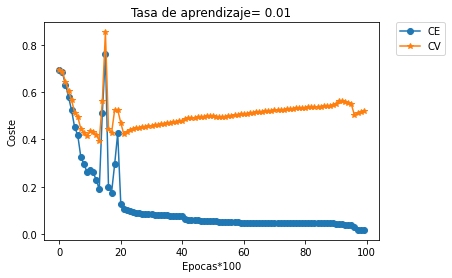

Mejor iteracion es: 1525 con la semilla: 39


In [55]:
seed=39

n_h=2
param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h, num_iter = 10000, tasa=0.01, semilla=seed, print_c=True, fx_activacion="sigmoide")


### Identificación del mejor modelo de red con una capa escondida

A continuación encontremos el mejor modelo con respecto al numero de neuronas que debemos incluir:
Vamos a usar ``prettytable`` para resumir los resultados en una tabla. Para ello, instalamos PTable desde el prompt de Anaconda: `` conda install -c conda-forge prettytable``

Con el fin de identificar el número óptimo de neuronas en la capa escondida, vamos a hacer una búsqueda de 1 a 20 neuronas y elegimos para cada configuración el número óptimo de épocas definiendo un numero maximo de epocas de 3000, y una tasa de aprendizaje de 0.01:

Coste tras la iteración 0: 0.692456
Coste tras la iteración 1000: 0.679369
Coste tras la iteración 2000: 0.679360


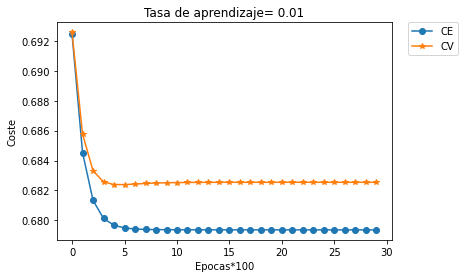

Mejor iteracion es: 448 con la semilla: 99
Número de neuronas: 1
Predv       False
Actualv          
0        0.573333
1        0.426667
Accuracy entrenamiento: 0.582857142857143  y accuracy validación: 0.5733333333333334
Coste tras la iteración 0: 0.693882
Coste tras la iteración 1000: 0.237163
Coste tras la iteración 2000: 0.496291


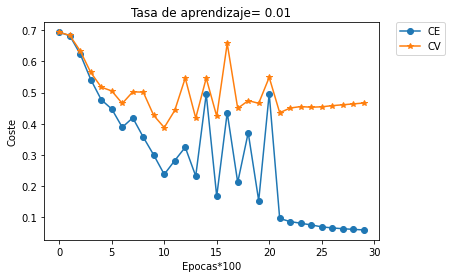

Mejor iteracion es: 1224 con la semilla: 99
Número de neuronas: 2
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9371428571428572  y accuracy validación: 0.84
Coste tras la iteración 0: 0.693082
Coste tras la iteración 1000: 0.387307
Coste tras la iteración 2000: 0.332490


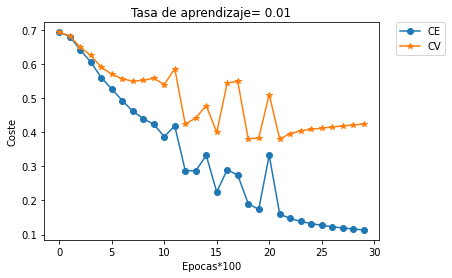

Mejor iteracion es: 2082 con la semilla: 99
Número de neuronas: 3
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9657142857142856  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.692500
Coste tras la iteración 1000: 0.323056
Coste tras la iteración 2000: 0.261596


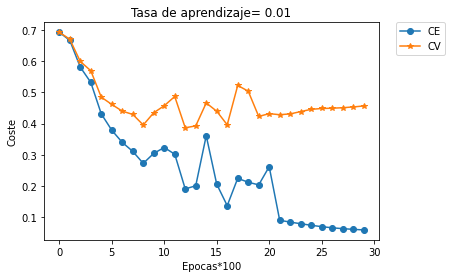

Mejor iteracion es: 1121 con la semilla: 99
Número de neuronas: 4
Predv       False     True 
Actualv                    
0        0.847826  0.137931
1        0.152174  0.862069
Accuracy entrenamiento: 0.9314285714285715  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.693050
Coste tras la iteración 1000: 0.336212
Coste tras la iteración 2000: 0.173439


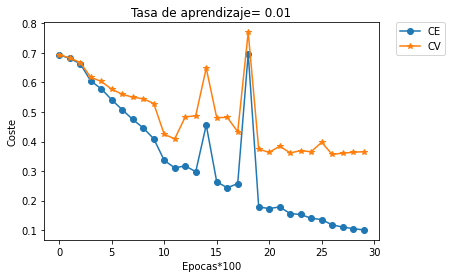

Mejor iteracion es: 2567 con la semilla: 99
Número de neuronas: 5
Predv       False    True 
Actualv                   
0        0.883721  0.15625
1        0.116279  0.84375
Accuracy entrenamiento: 0.9885714285714284  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.692827
Coste tras la iteración 1000: 0.286265
Coste tras la iteración 2000: 0.075374


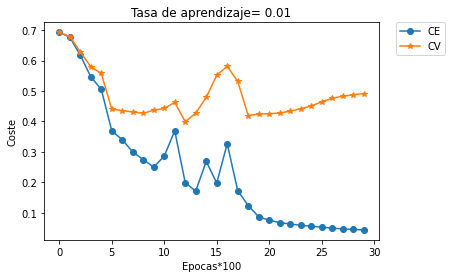

Mejor iteracion es: 1144 con la semilla: 99
Número de neuronas: 6
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9371428571428573  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.693058
Coste tras la iteración 1000: 0.261701
Coste tras la iteración 2000: 0.106197


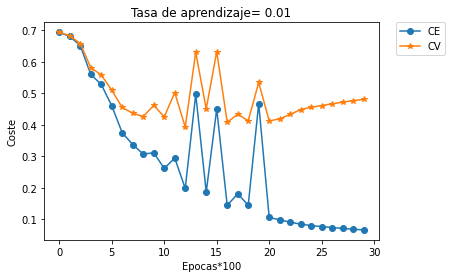

Mejor iteracion es: 1005 con la semilla: 99
Número de neuronas: 7
Predv       False     True 
Actualv                    
0        0.886364  0.129032
1        0.113636  0.870968
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.88
Coste tras la iteración 0: 0.695372
Coste tras la iteración 1000: 0.281935
Coste tras la iteración 2000: 0.212743


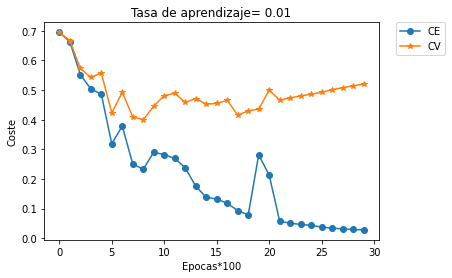

Mejor iteracion es: 888 con la semilla: 99
Número de neuronas: 8
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.84
Coste tras la iteración 0: 0.692791
Coste tras la iteración 1000: 0.303779
Coste tras la iteración 2000: 0.055843


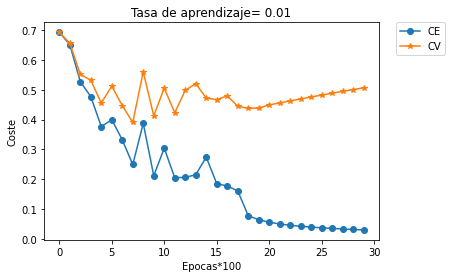

Mejor iteracion es: 972 con la semilla: 99
Número de neuronas: 9
Predv       False     True 
Actualv                    
0        0.866667  0.133333
1        0.133333  0.866667
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.692651
Coste tras la iteración 1000: 0.185511
Coste tras la iteración 2000: 0.059830


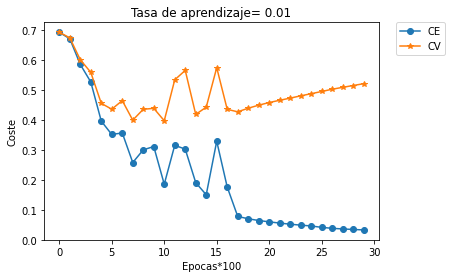

Mejor iteracion es: 1547 con la semilla: 99
Número de neuronas: 10
Predv       False    True 
Actualv                   
0        0.883721  0.15625
1        0.116279  0.84375
Accuracy entrenamiento: 0.9542857142857142  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.694044
Coste tras la iteración 1000: 0.317901
Coste tras la iteración 2000: 0.051320


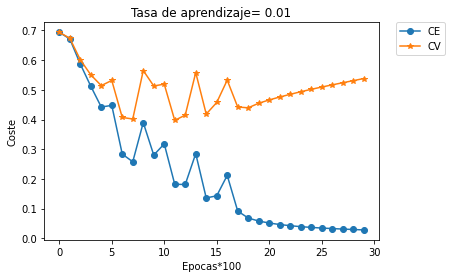

Mejor iteracion es: 880 con la semilla: 99
Número de neuronas: 11
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.695684
Coste tras la iteración 1000: 0.328260
Coste tras la iteración 2000: 0.053785


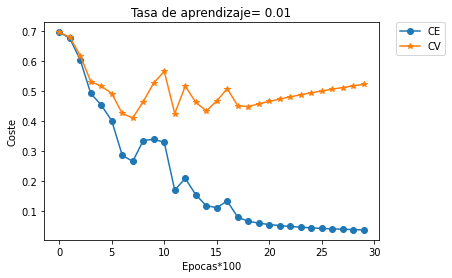

Mejor iteracion es: 865 con la semilla: 99
Número de neuronas: 12
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9257142857142857  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.695917
Coste tras la iteración 1000: 0.164546
Coste tras la iteración 2000: 0.042013


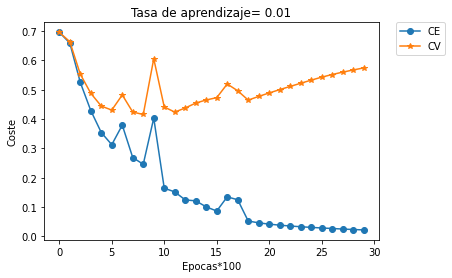

Mejor iteracion es: 801 con la semilla: 99
Número de neuronas: 13
Predv       False     True 
Actualv                    
0        0.880952  0.181818
1        0.119048  0.818182
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.691771
Coste tras la iteración 1000: 0.294284
Coste tras la iteración 2000: 0.044211


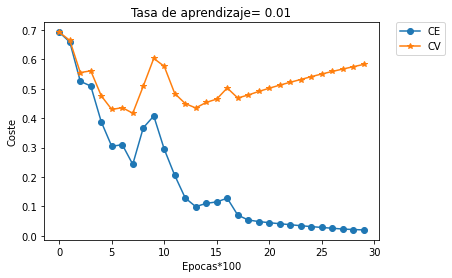

Mejor iteracion es: 766 con la semilla: 99
Número de neuronas: 14
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.693948
Coste tras la iteración 1000: 0.150886
Coste tras la iteración 2000: 0.047707


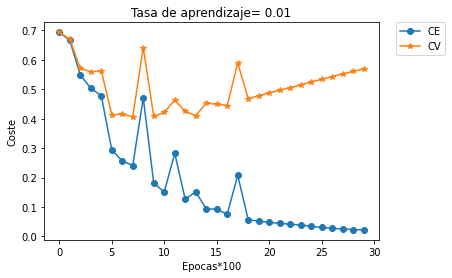

Mejor iteracion es: 1043 con la semilla: 99
Número de neuronas: 15
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9371428571428572  y accuracy validación: 0.84
Coste tras la iteración 0: 0.691814
Coste tras la iteración 1000: 0.158955
Coste tras la iteración 2000: 0.042744


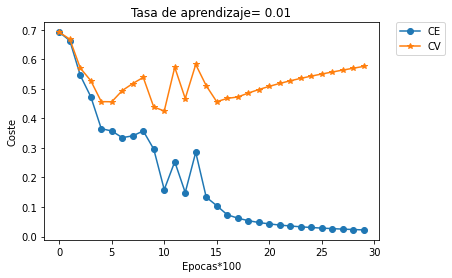

Mejor iteracion es: 748 con la semilla: 99
Número de neuronas: 16
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.694666
Coste tras la iteración 1000: 0.171545
Coste tras la iteración 2000: 0.038065


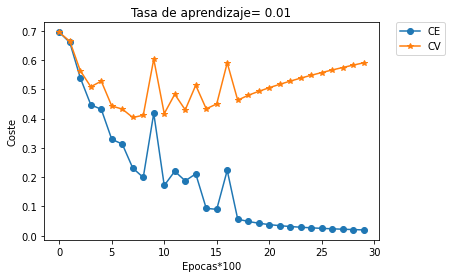

Mejor iteracion es: 691 con la semilla: 99
Número de neuronas: 17
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.691798
Coste tras la iteración 1000: 0.423873
Coste tras la iteración 2000: 0.031759


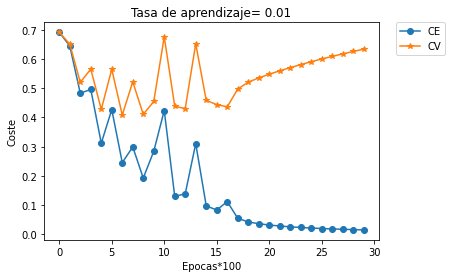

Mejor iteracion es: 790 con la semilla: 99
Número de neuronas: 18
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9314285714285715  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.694170
Coste tras la iteración 1000: 0.162319
Coste tras la iteración 2000: 0.034284


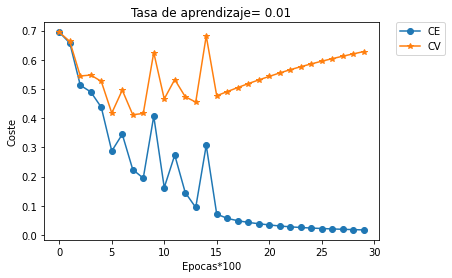

Mejor iteracion es: 734 con la semilla: 99
Número de neuronas: 19
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.92  y accuracy validación: 0.84
Coste tras la iteración 0: 0.693206
Coste tras la iteración 1000: 0.167607
Coste tras la iteración 2000: 0.031468


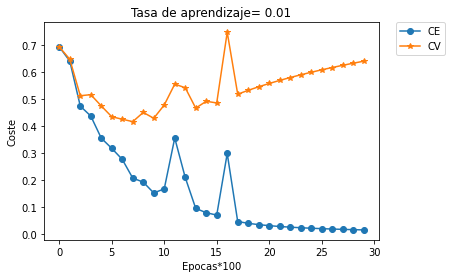

Mejor iteracion es: 540 con la semilla: 99
Número de neuronas: 20
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.84


FileNotFoundError: [Errno 2] No such file or directory: 'Resultados/RedSencilla.txt'

In [59]:
import pandas as pd
from prettytable import PrettyTable

x = PrettyTable(["NNeurons", "Acc_E", "Acc_V", "epoca"])

for i in range(1,21):
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = 3000, tasa = 0.01, semilla = 99, print_c=True, fx_activacion="sigmoide")
    # nos quedamos con el mejor numero de epocas
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = (epoc+1), tasa = 0.01, semilla = 99, print_c=False, fx_activacion="sigmoide")
    
    # predicciones
    pE=pred(param, CE_x, "sigmoide")
    pV=pred(param, CV_x, "sigmoide")
    
    # Accuracy
    # entrenamiento
    Acc_e = np.sum((pE == CE_y)/n)
    
    # validacion
    Acc_v = np.sum((pV == CV_y)/m)
    
    #matrices de confusion para train y validacion
    ye_actu = pd.Series(CE_y.ravel(), name='Actuale')
    ye_pred = pd.Series(pE.ravel(), name='Prede')
   
    df_confusione = pd.crosstab(ye_actu, ye_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    yv_actu = pd.Series(CV_y.ravel(), name='Actualv')
    yv_pred = pd.Series(pV.ravel(), name='Predv')
   
    df_confusionv = pd.crosstab(yv_actu, yv_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    print("Número de neuronas: " +str(i))
    print(df_confusionv)
    print("Accuracy entrenamiento: "  + str(Acc_e), " y accuracy validación: " + str(Acc_v) )
    
    x.add_row([i, Acc_e, Acc_v, epoc])
     
mets = x.get_string()

with open('Resultados/RedSencilla.txt', 'w') as f:  #guardamos los datos en la carpeta Resultados
    f.write(mets)
    
print(x)

Probemos nuestro modelo sobre una nueva imagen. Para ello cargamos la imagen ``IMG_3451.JPG`` con ayuda de la API ``Keras`` (https://keras.io/), compatible con múltiples marcos computacionales para el aprendizaje computacional, como Theano, CNTK, siendo el marco oficial para  ``TensorFlow`` (https://www.tensorflow.org/guide/keras/overview).

Debemos instalar e importar ``Keras``:

`` conda install -c conda-forge keras``

Cualquier duda para la instalacion de paquetes de software desde Anaconda: https://anaconda.org/conda-forge/keras
Esta API la vamos a utilizar más exhaustivamente cuando veamos redes más complejas.

In [60]:
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# load the image
img = load_img('IMG_3451.jpg')
print(type(img))
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
float32
(3000, 4000, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


Cargamos nuestro mejor modelo y lo pasamos por la imagen en busca de frailejones:

In [61]:
# Obtenemos el modelo
param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = 5, num_iter = 2527, tasa = 0.01, semilla = 99, print_c=False, fx_activacion="sigmoide")
param

{'W1': array([[-0.00084363,  0.02115425,  0.00325628, ..., -0.01721918,
         -0.00578493,  0.01844699],
        [ 0.00455565,  0.04104755,  0.03765674, ..., -0.06155366,
         -0.08144314, -0.06989619],
        [ 0.01667005,  0.00229709, -0.00393187, ...,  0.00853301,
         -0.01070426, -0.00442352],
        [ 0.00103609,  0.00251702,  0.00036749, ...,  0.00552288,
         -0.01966546,  0.00684323],
        [-0.01297764,  0.01961284, -0.0286072 , ...,  0.00960413,
          0.00209636, -0.00181172]]),
 'b1': array([[ 0.00121436],
        [-0.10694353],
        [-0.00170634],
        [-0.00165278],
        [ 0.00141783]]),
 'W2': array([[-0.11102774,  2.34102863,  0.12120468,  0.07956872, -0.14402946]]),
 'b2': array([[-0.14286504]])}

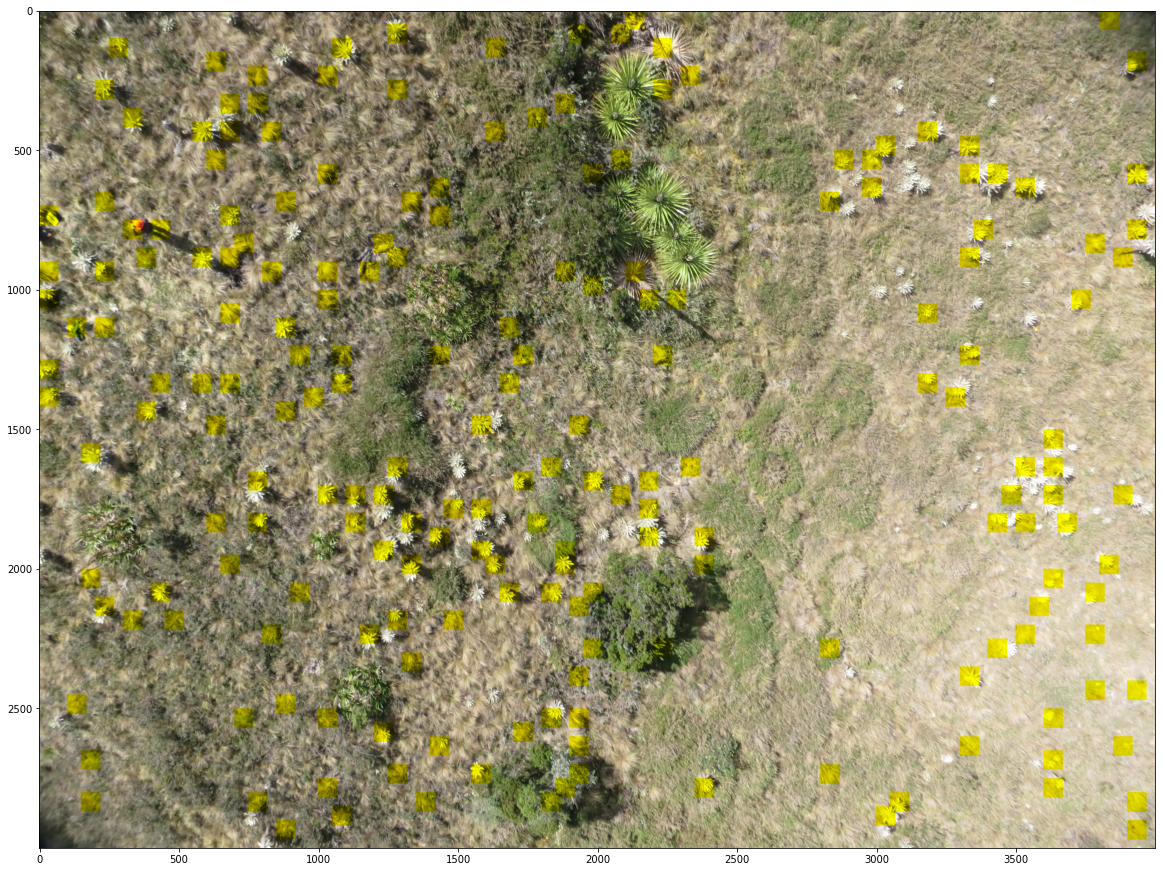

In [63]:
# Lo pasamos por nuestra imagen de prueba
x = np.array(img)
x2 = x

ni = x.shape[0]-50
mi = x.shape[1]-50

f1=0
f2=70
for i in range(1,ni,50):
    c1=0
    c2=70
    for j in range(1,mi,50):
        subi=x[f1:f2,c1:c2,]
        subi2=np.ndarray.flatten(subi).T/255.
        ns=subi2.shape[0]
        vec=subi2
        vec.shape=(ns,1)
        pred_P=pred(param, vec, "sigmoide")
        if(pred_P==1):
            x2[f1:f2,c1:c2,2]=0
        c1=c1+50
        c2=c2+50
    f1=f1+50
    f2=f2+50
        
plt.figure(figsize = (20,20))
plt.imshow(x2)

Coste tras la iteración 0: 0.692456
Coste tras la iteración 1000: 0.679369
Coste tras la iteración 2000: 0.679360


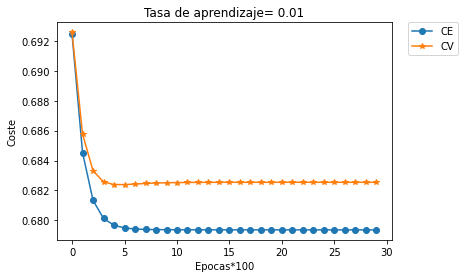

Mejor iteracion es: 448 con la semilla: 99
Número de neuronas: 1
Predv       False
Actualv          
0        0.573333
1        0.426667
Accuracy entrenamiento: 0.582857142857143  y accuracy validación: 0.5733333333333334
Coste tras la iteración 0: 0.693882
Coste tras la iteración 1000: 0.237163
Coste tras la iteración 2000: 0.496291


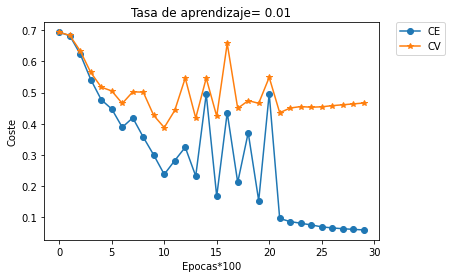

Mejor iteracion es: 1224 con la semilla: 99
Número de neuronas: 2
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9371428571428572  y accuracy validación: 0.84
Coste tras la iteración 0: 0.693082
Coste tras la iteración 1000: 0.387307
Coste tras la iteración 2000: 0.332490


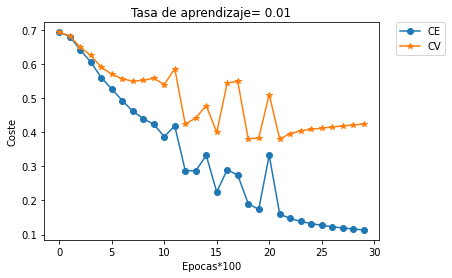

Mejor iteracion es: 2082 con la semilla: 99
Número de neuronas: 3
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9657142857142856  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.692500
Coste tras la iteración 1000: 0.323056
Coste tras la iteración 2000: 0.261596


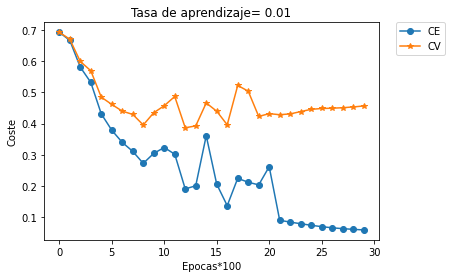

Mejor iteracion es: 1121 con la semilla: 99
Número de neuronas: 4
Predv       False     True 
Actualv                    
0        0.847826  0.137931
1        0.152174  0.862069
Accuracy entrenamiento: 0.9314285714285715  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.693050
Coste tras la iteración 1000: 0.336212
Coste tras la iteración 2000: 0.173439


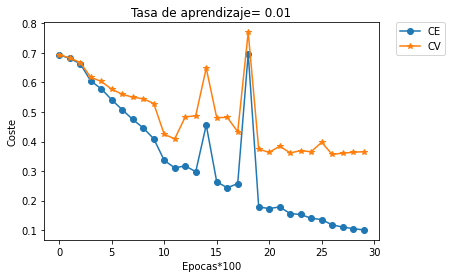

Mejor iteracion es: 2567 con la semilla: 99
Número de neuronas: 5
Predv       False    True 
Actualv                   
0        0.883721  0.15625
1        0.116279  0.84375
Accuracy entrenamiento: 0.9885714285714284  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.692827
Coste tras la iteración 1000: 0.286265
Coste tras la iteración 2000: 0.075374


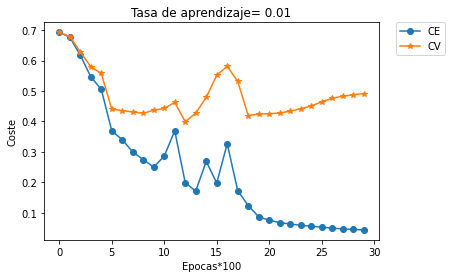

Mejor iteracion es: 1144 con la semilla: 99
Número de neuronas: 6
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9371428571428573  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.693058
Coste tras la iteración 1000: 0.261701
Coste tras la iteración 2000: 0.106197


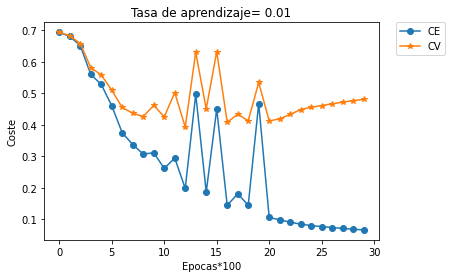

Mejor iteracion es: 1005 con la semilla: 99
Número de neuronas: 7
Predv       False     True 
Actualv                    
0        0.886364  0.129032
1        0.113636  0.870968
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.88
Coste tras la iteración 0: 0.695372
Coste tras la iteración 1000: 0.281935
Coste tras la iteración 2000: 0.212743


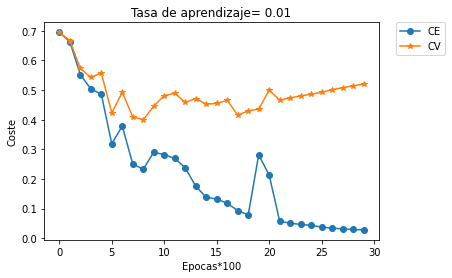

Mejor iteracion es: 888 con la semilla: 99
Número de neuronas: 8
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.84
Coste tras la iteración 0: 0.692791
Coste tras la iteración 1000: 0.303779
Coste tras la iteración 2000: 0.055843


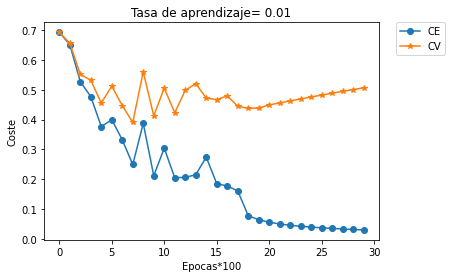

Mejor iteracion es: 972 con la semilla: 99
Número de neuronas: 9
Predv       False     True 
Actualv                    
0        0.866667  0.133333
1        0.133333  0.866667
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.692651
Coste tras la iteración 1000: 0.185511
Coste tras la iteración 2000: 0.059830


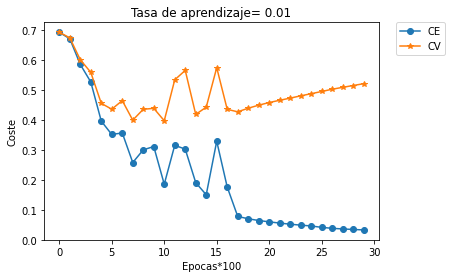

Mejor iteracion es: 1547 con la semilla: 99
Número de neuronas: 10
Predv       False    True 
Actualv                   
0        0.883721  0.15625
1        0.116279  0.84375
Accuracy entrenamiento: 0.9542857142857142  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.694044
Coste tras la iteración 1000: 0.317901
Coste tras la iteración 2000: 0.051320


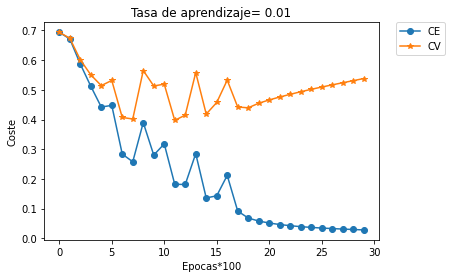

Mejor iteracion es: 880 con la semilla: 99
Número de neuronas: 11
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.695684
Coste tras la iteración 1000: 0.328260
Coste tras la iteración 2000: 0.053785


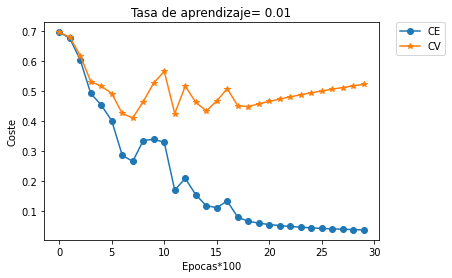

Mejor iteracion es: 865 con la semilla: 99
Número de neuronas: 12
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9257142857142857  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.695917
Coste tras la iteración 1000: 0.164546
Coste tras la iteración 2000: 0.042013


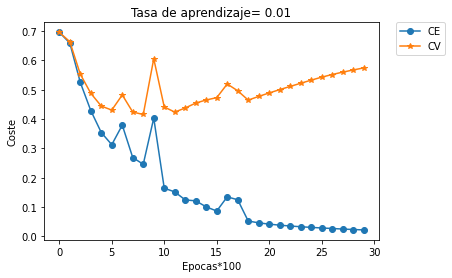

Mejor iteracion es: 801 con la semilla: 99
Número de neuronas: 13
Predv       False     True 
Actualv                    
0        0.880952  0.181818
1        0.119048  0.818182
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.691771
Coste tras la iteración 1000: 0.294284
Coste tras la iteración 2000: 0.044211


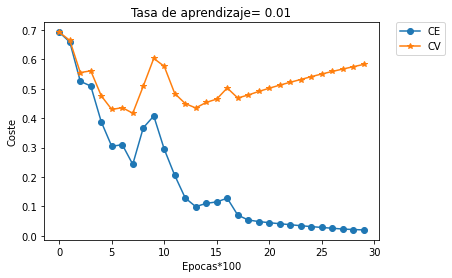

Mejor iteracion es: 766 con la semilla: 99
Número de neuronas: 14
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.693948
Coste tras la iteración 1000: 0.150886
Coste tras la iteración 2000: 0.047707


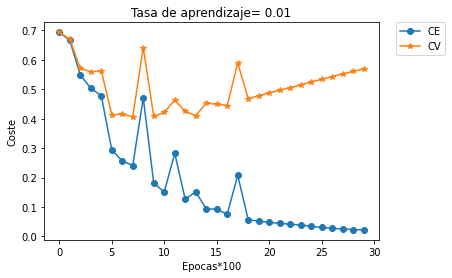

Mejor iteracion es: 1043 con la semilla: 99
Número de neuronas: 15
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9371428571428572  y accuracy validación: 0.84
Coste tras la iteración 0: 0.691814
Coste tras la iteración 1000: 0.158955
Coste tras la iteración 2000: 0.042744


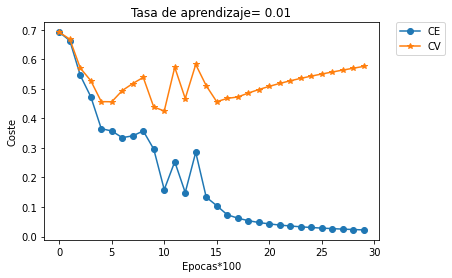

Mejor iteracion es: 748 con la semilla: 99
Número de neuronas: 16
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.694666
Coste tras la iteración 1000: 0.171545
Coste tras la iteración 2000: 0.038065


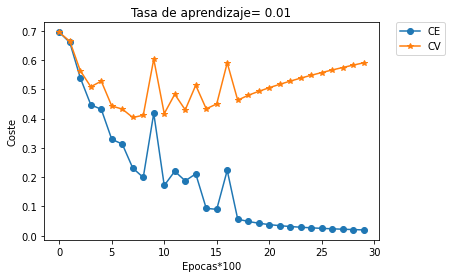

Mejor iteracion es: 691 con la semilla: 99
Número de neuronas: 17
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.691798
Coste tras la iteración 1000: 0.423873
Coste tras la iteración 2000: 0.031759


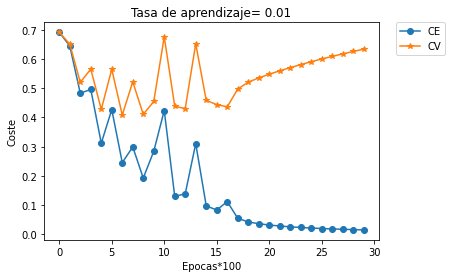

Mejor iteracion es: 790 con la semilla: 99
Número de neuronas: 18
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9314285714285715  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.694170
Coste tras la iteración 1000: 0.162319
Coste tras la iteración 2000: 0.034284


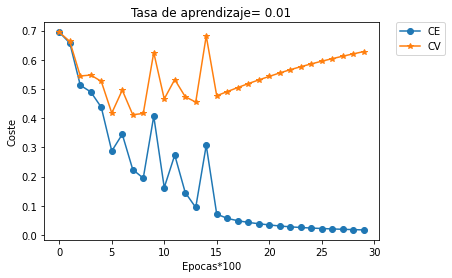

Mejor iteracion es: 734 con la semilla: 99
Número de neuronas: 19
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.92  y accuracy validación: 0.84
Coste tras la iteración 0: 0.693206
Coste tras la iteración 1000: 0.167607
Coste tras la iteración 2000: 0.031468


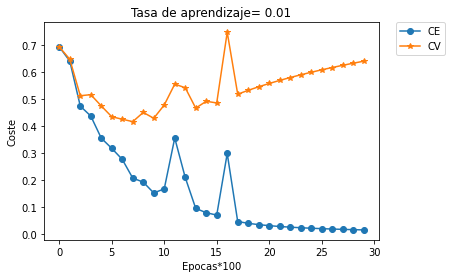

Mejor iteracion es: 540 con la semilla: 99
Número de neuronas: 20
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.84


FileNotFoundError: [Errno 2] No such file or directory: 'Resultados/frailejon_sigmoide.txt'

In [64]:
x = PrettyTable(["NNeurons", "Acc_E", "Acc_V", "epoca"])

for i in range(1,21):
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = 3000, tasa = 0.01, semilla = 99, print_c=True, fx_activacion="sigmoide")
    # nos quedamos con el mejor numero de epocas
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = (epoc+1), tasa = 0.01, semilla = 99, print_c=False, fx_activacion="sigmoide")
    
    # predicciones
    pE=pred(param, CE_x, "sigmoide")
    pV=pred(param, CV_x, "sigmoide")
    
    # Accuracy
    # entrenamiento
    Acc_e = np.sum((pE == CE_y)/n)
    
    # validacion
    Acc_v = np.sum((pV == CV_y)/m)
    
    #matrices de confusion para train y validacion
    ye_actu = pd.Series(CE_y.ravel(), name='Actuale')
    ye_pred = pd.Series(pE.ravel(), name='Prede')
   
    df_confusione = pd.crosstab(ye_actu, ye_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    yv_actu = pd.Series(CV_y.ravel(), name='Actualv')
    yv_pred = pd.Series(pV.ravel(), name='Predv')
   
    df_confusionv = pd.crosstab(yv_actu, yv_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    print("Número de neuronas: " +str(i))
    print(df_confusionv)
    print("Accuracy entrenamiento: "  + str(Acc_e), " y accuracy validación: " + str(Acc_v) )
    
    x.add_row([i, Acc_e, Acc_v, epoc])
     
mets = x.get_string()

with open('Resultados/frailejon_sigmoide.txt', 'w') as f:  #guardamos los datos en la carpeta Resultados
    f.write(mets)
    
print(x)

### Pregunta 5.1

A partir de esta prueba *cualitativa* del modelo, y junto con las estadísticas obtenidas en su desarrollo, analice los resultados y proponga estrategias para seguir mejorando el modelo para la detección automática de especies nativas en los páramos. 

In [65]:
# Obtenemos el modelo
param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = 5, num_iter = 2527, tasa = 0.01, semilla = 99, print_c=False, fx_activacion="relu")
param

<ipython-input-25-bcba200444bd>:15: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


{'W1': array([[ 0.00178715,  0.02155344,  0.00720352, ..., -0.04184195,
         -0.02765921, -0.00103461],
        [-0.01968363,  0.02698711,  0.01036864, ...,  0.0257484 ,
         -0.00184864, -0.00353732],
        [ 0.02026862,  0.00496189,  0.00067964, ..., -0.00853609,
         -0.02611045, -0.01736496],
        [ 0.00536206,  0.00537515,  0.00466367, ..., -0.00698522,
         -0.03065914, -0.00311204],
        [-0.01379319,  0.01992261, -0.0292974 , ...,  0.01782279,
          0.00922915,  0.00443766]]),
 'b1': array([[-0.02151149],
        [ 0.01704518],
        [-0.01536128],
        [-0.01587087],
        [ 0.01076245]]),
 'W2': array([[ 0.32659941, -0.2497383 ,  0.21917089,  0.19206082, -0.15922542]]),
 'b2': array([[0.05647189]])}

<p style="color:red">COMENTARIO:</p> 

Coste tras la iteración 0: 0.692456
Coste tras la iteración 1000: 0.679369
Coste tras la iteración 2000: 0.679360


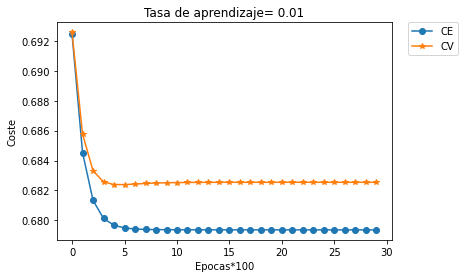

Mejor iteracion es: 448 con la semilla: 99
Número de neuronas: 1
Predv       False
Actualv          
0        0.573333
1        0.426667
Accuracy entrenamiento: 0.582857142857143  y accuracy validación: 0.5733333333333334
Coste tras la iteración 0: 0.693882
Coste tras la iteración 1000: 0.237163
Coste tras la iteración 2000: 0.496291


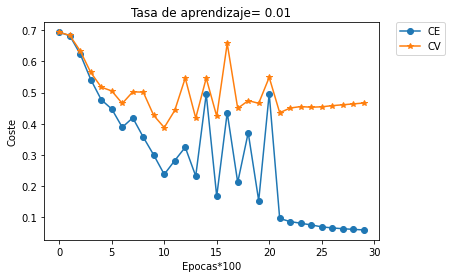

Mejor iteracion es: 1224 con la semilla: 99
Número de neuronas: 2
Predv    False  True 
Actualv              
0         0.78   0.16
1         0.22   0.84
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8
Coste tras la iteración 0: 0.693082
Coste tras la iteración 1000: 0.387307
Coste tras la iteración 2000: 0.332490


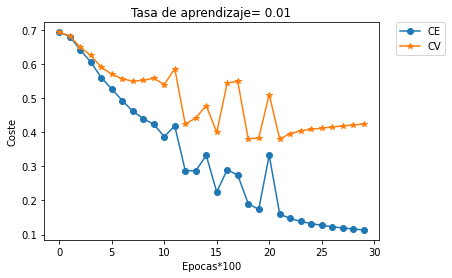

Mejor iteracion es: 2082 con la semilla: 99
Número de neuronas: 3
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.9485714285714286  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: 0.692500
Coste tras la iteración 1000: 0.323056
Coste tras la iteración 2000: 0.261596


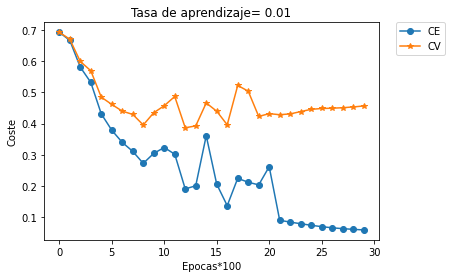

Mejor iteracion es: 1121 con la semilla: 99
Número de neuronas: 4
Predv       False     True 
Actualv                    
0        0.847826  0.137931
1        0.152174  0.862069
Accuracy entrenamiento: 0.9371428571428573  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.693050
Coste tras la iteración 1000: 0.336212
Coste tras la iteración 2000: 0.173439


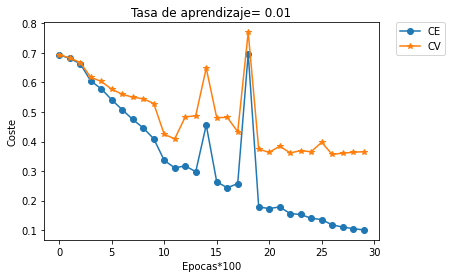

Mejor iteracion es: 2567 con la semilla: 99
Número de neuronas: 5
Predv       False    True 
Actualv                   
0        0.883721  0.15625
1        0.116279  0.84375
Accuracy entrenamiento: 0.9828571428571427  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.692827
Coste tras la iteración 1000: 0.286265
Coste tras la iteración 2000: 0.075374


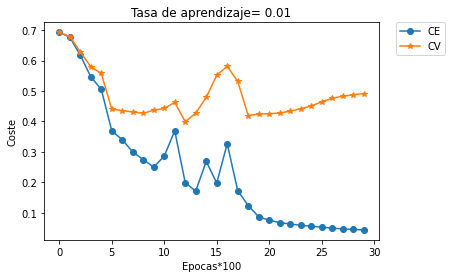

Mejor iteracion es: 1144 con la semilla: 99
Número de neuronas: 6
Predv    False  True 
Actualv              
0         0.78   0.16
1         0.22   0.84
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.8
Coste tras la iteración 0: 0.693058
Coste tras la iteración 1000: 0.261701
Coste tras la iteración 2000: 0.106197


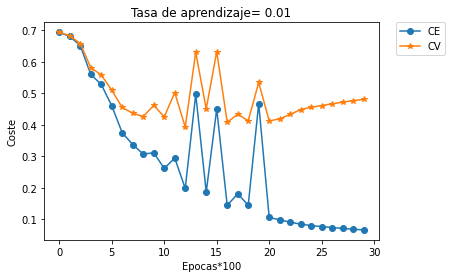

Mejor iteracion es: 1005 con la semilla: 99
Número de neuronas: 7
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.84
Coste tras la iteración 0: 0.695372
Coste tras la iteración 1000: 0.281935
Coste tras la iteración 2000: 0.212743


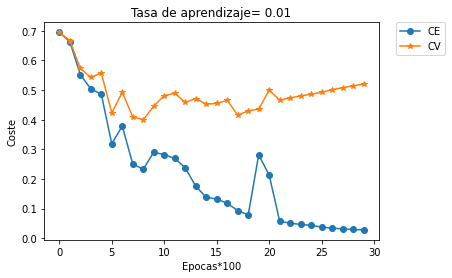

Mejor iteracion es: 888 con la semilla: 99
Número de neuronas: 8
Predv    False  True 
Actualv              
0         0.78   0.16
1         0.22   0.84
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8
Coste tras la iteración 0: 0.692791
Coste tras la iteración 1000: 0.303779
Coste tras la iteración 2000: 0.055843


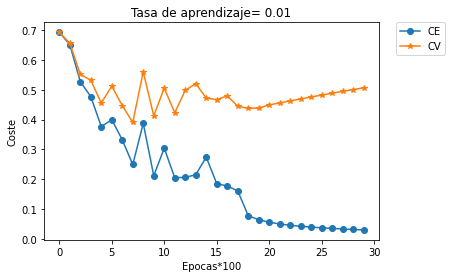

Mejor iteracion es: 972 con la semilla: 99
Número de neuronas: 9
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9257142857142858  y accuracy validación: 0.84
Coste tras la iteración 0: 0.692651
Coste tras la iteración 1000: 0.185511
Coste tras la iteración 2000: 0.059830


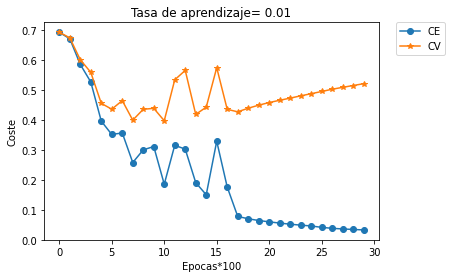

Mejor iteracion es: 1547 con la semilla: 99
Número de neuronas: 10
Predv       False     True 
Actualv                    
0        0.866667  0.133333
1        0.133333  0.866667
Accuracy entrenamiento: 0.96  y accuracy validación: 0.8666666666666667
Coste tras la iteración 0: 0.694044
Coste tras la iteración 1000: 0.317901
Coste tras la iteración 2000: 0.051320


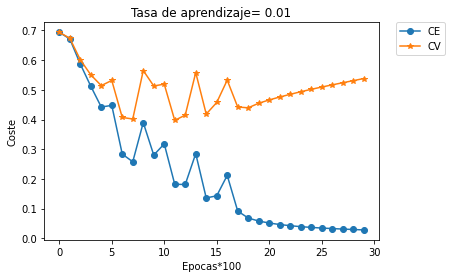

Mejor iteracion es: 880 con la semilla: 99
Número de neuronas: 11
Predv       False     True 
Actualv                    
0        0.829787  0.142857
1        0.170213  0.857143
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.84
Coste tras la iteración 0: 0.695684
Coste tras la iteración 1000: 0.328260
Coste tras la iteración 2000: 0.053785


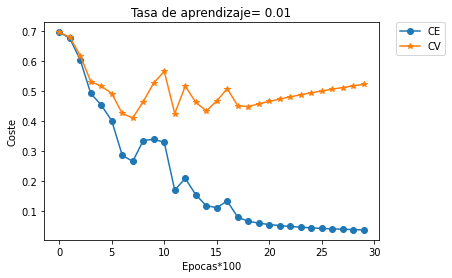

Mejor iteracion es: 865 con la semilla: 99
Número de neuronas: 12
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.9257142857142857  y accuracy validación: 0.84
Coste tras la iteración 0: 0.695917
Coste tras la iteración 1000: 0.164546
Coste tras la iteración 2000: 0.042013


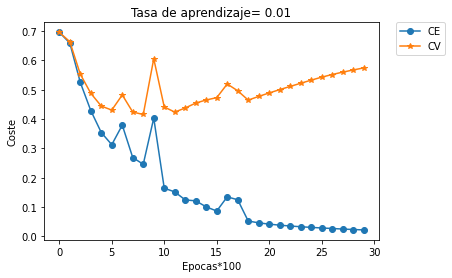

Mejor iteracion es: 801 con la semilla: 99
Número de neuronas: 13
Predv       False    True 
Actualv                   
0        0.863636  0.16129
1        0.136364  0.83871
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 0.691771
Coste tras la iteración 1000: 0.294284
Coste tras la iteración 2000: 0.044211


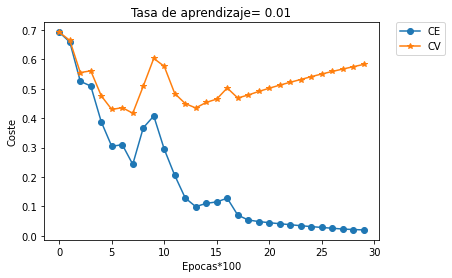

Mejor iteracion es: 766 con la semilla: 99
Número de neuronas: 14
Predv       False     True 
Actualv                    
0        0.844444  0.166667
1        0.155556  0.833333
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.84
Coste tras la iteración 0: 0.693948
Coste tras la iteración 1000: 0.150886
Coste tras la iteración 2000: 0.047707


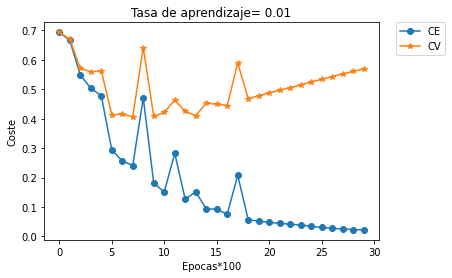

Mejor iteracion es: 1043 con la semilla: 99
Número de neuronas: 15
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.9085714285714287  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: 0.691814
Coste tras la iteración 1000: 0.158955
Coste tras la iteración 2000: 0.042744


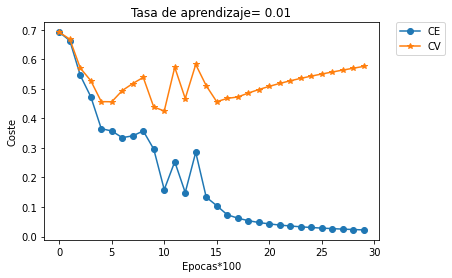

Mejor iteracion es: 748 con la semilla: 99
Número de neuronas: 16
Predv       False     True 
Actualv                    
0        0.795918  0.153846
1        0.204082  0.846154
Accuracy entrenamiento: 0.92  y accuracy validación: 0.8133333333333334
Coste tras la iteración 0: 0.694666
Coste tras la iteración 1000: 0.171545
Coste tras la iteración 2000: 0.038065


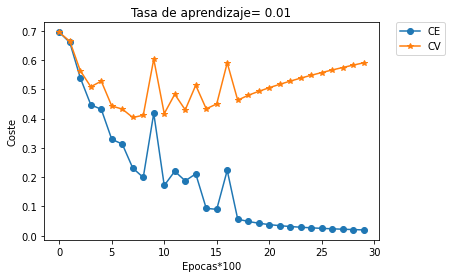

Mejor iteracion es: 691 con la semilla: 99
Número de neuronas: 17
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.691798
Coste tras la iteración 1000: 0.423873
Coste tras la iteración 2000: 0.031759


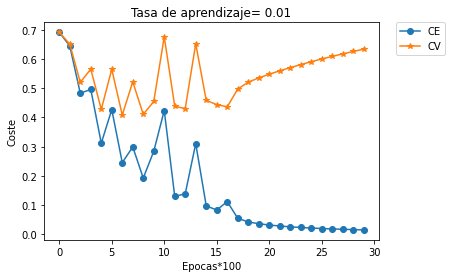

Mejor iteracion es: 790 con la semilla: 99
Número de neuronas: 18
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.92  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: 0.694170
Coste tras la iteración 1000: 0.162319
Coste tras la iteración 2000: 0.034284


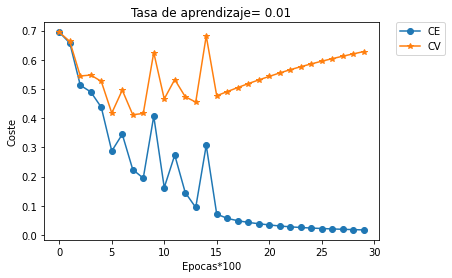

Mejor iteracion es: 734 con la semilla: 99
Número de neuronas: 19
Predv     False     True 
Actualv                  
0        0.8125  0.148148
1        0.1875  0.851852
Accuracy entrenamiento: 0.9200000000000002  y accuracy validación: 0.8266666666666667
Coste tras la iteración 0: 0.693206
Coste tras la iteración 1000: 0.167607
Coste tras la iteración 2000: 0.031468


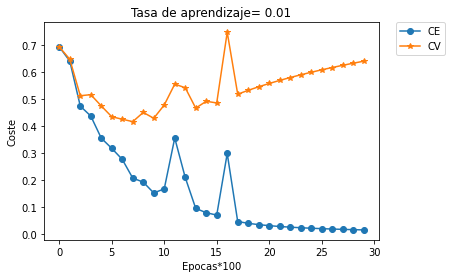

Mejor iteracion es: 540 con la semilla: 99
Número de neuronas: 20
Predv       False     True 
Actualv                    
0        0.808511  0.178571
1        0.191489  0.821429
Accuracy entrenamiento: 0.9142857142857144  y accuracy validación: 0.8133333333333334


FileNotFoundError: [Errno 2] No such file or directory: 'Resultados/frailejon_tanh.txt'

In [67]:
x = PrettyTable(["NNeurons", "Acc_E", "Acc_V", "epoca"])

for i in range(1,21):
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = 3000, tasa = 0.01, semilla = 99, print_c=True, fx_activacion="sigmoide")
    # nos quedamos con el mejor numero de epocas
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = (epoc+1), tasa = 0.01, semilla = 99, print_c=False, fx_activacion="sigmoide")
    
    # predicciones
    pE=pred(param, CE_x, "relu")
    pV=pred(param, CV_x, "relu")
    
    # Accuracy
    # entrenamiento
    Acc_e = np.sum((pE == CE_y)/n)
    
    # validacion
    Acc_v = np.sum((pV == CV_y)/m)
    
    #matrices de confusion para train y validacion
    ye_actu = pd.Series(CE_y.ravel(), name='Actuale')
    ye_pred = pd.Series(pE.ravel(), name='Prede')
   
    df_confusione = pd.crosstab(ye_actu, ye_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    yv_actu = pd.Series(CV_y.ravel(), name='Actualv')
    yv_pred = pd.Series(pV.ravel(), name='Predv')
   
    df_confusionv = pd.crosstab(yv_actu, yv_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    print("Número de neuronas: " +str(i))
    print(df_confusionv)
    print("Accuracy entrenamiento: "  + str(Acc_e), " y accuracy validación: " + str(Acc_v) )
    
    x.add_row([i, Acc_e, Acc_v, epoc])
     
mets = x.get_string()

with open('Resultados/frailejon_relu.txt', 'w') as f:  #guardamos los datos en la carpeta Resultados
    f.write(mets)
    
print(x)

Teniendo en cuenta que el procesamiento digital de imágenes se realiza sobre niveles digitales en donde el rango de la variable está entre 0 y 255, se evaluó el comportamiento de la clasificación con una función de activación ReLU para la capa de salida, obteniendo el mejor resultado con 5 neuronas y un Accuracy entrenamiento: 0.9828571428571427  y accuracy validación: 0.8666666666666667.

<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 0: nan
Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


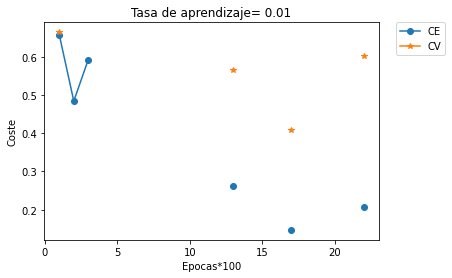

Mejor iteracion es: 1365 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 1
Predv       False     True 
Actualv                    
0        0.880952  0.181818
1        0.119048  0.818182
Accuracy entrenamiento: 0.9428571428571428  y accuracy validación: 0.8533333333333333
Coste tras la iteración 0: 1.782552


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


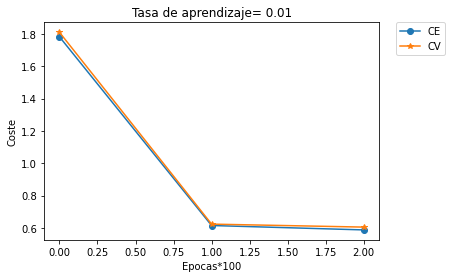

Mejor iteracion es: 773 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 2
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.8857142857142859  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


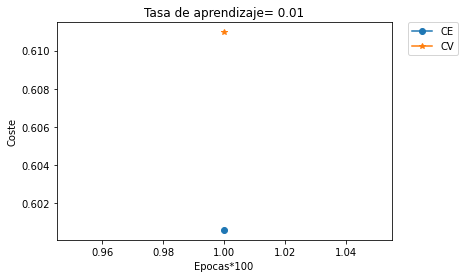

Mejor iteracion es: 148 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 3
Predv       False  True 
Actualv                 
0        0.709091    0.2
1        0.290909    0.8
Accuracy entrenamiento: 0.7885714285714287  y accuracy validación: 0.7333333333333334
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


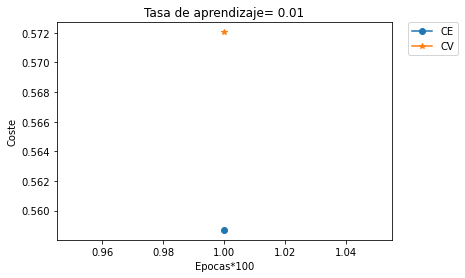

Mejor iteracion es: 109 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 4
Predv       False     True 
Actualv                    
0        0.655738  0.214286
1        0.344262  0.785714
Accuracy entrenamiento: 0.6857142857142857  y accuracy validación: 0.6799999999999999
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


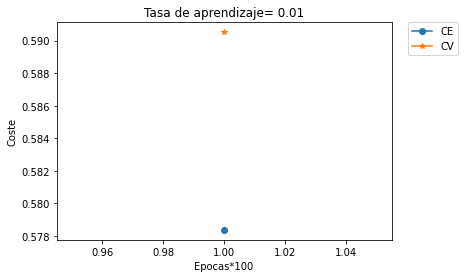

Mejor iteracion es: 140 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 5
Predv    False     True 
Actualv                 
0         0.75  0.173913
1         0.25  0.826087
Accuracy entrenamiento: 0.822857142857143  y accuracy validación: 0.7733333333333333
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


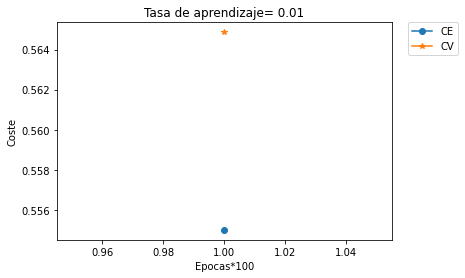

Mejor iteracion es: 112 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 6
Predv       False     True 
Actualv                    
0        0.689655  0.176471
1        0.310345  0.823529
Accuracy entrenamiento: 0.7942857142857144  y accuracy validación: 0.7200000000000001
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


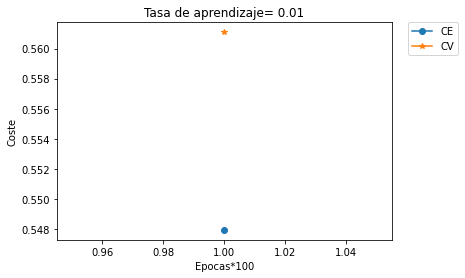

Mejor iteracion es: 126 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 7
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.8514285714285714  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: 1.400766


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


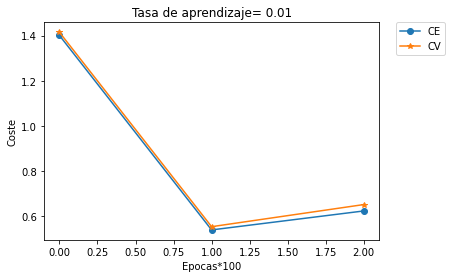

Mejor iteracion es: 125 con la semilla: 99
Número de neuronas: 8
Predv      False     True 
Actualv                   
0        0.77551  0.192308
1        0.22449  0.807692
Accuracy entrenamiento: 0.8742857142857143  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


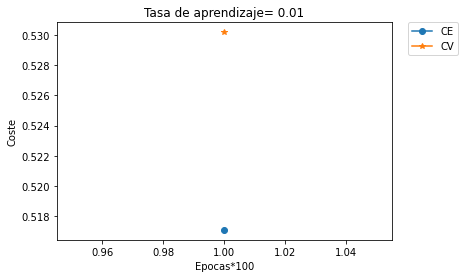

Mejor iteracion es: 110 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 9
Predv    False     True 
Actualv                 
0         0.75  0.173913
1         0.25  0.826087
Accuracy entrenamiento: 0.8571428571428572  y accuracy validación: 0.7733333333333333
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


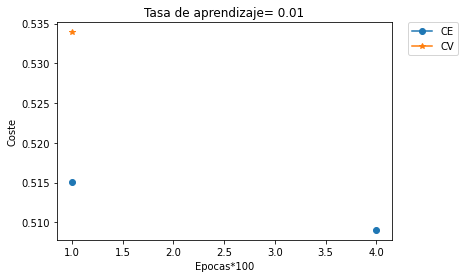

Mejor iteracion es: 813 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 10
Predv       False  True 
Actualv                 
0        0.822222    0.2
1        0.177778    0.8
Accuracy entrenamiento: 0.9371428571428573  y accuracy validación: 0.8133333333333332
Coste tras la iteración 0: 1.881018


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


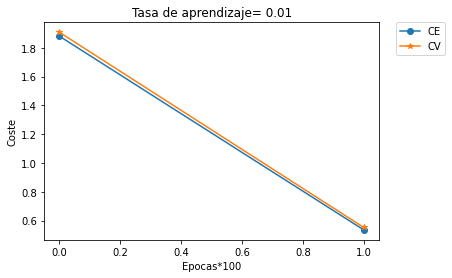

Mejor iteracion es: 121 con la semilla: 99
Número de neuronas: 11
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.8457142857142859  y accuracy validación: 0.7866666666666667
Coste tras la iteración 0: 1.533780


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


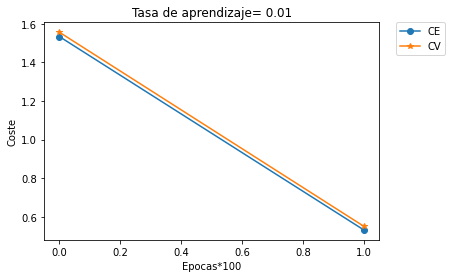

Mejor iteracion es: 120 con la semilla: 99
Número de neuronas: 12
Predv       False     True 
Actualv                    
0        0.764706  0.166667
1        0.235294  0.833333
Accuracy entrenamiento: 0.8628571428571429  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: 1.331372


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


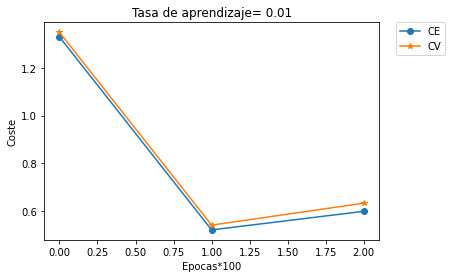

Mejor iteracion es: 115 con la semilla: 99
Número de neuronas: 13
Predv    False     True 
Actualv                 
0         0.75  0.173913
1         0.25  0.826087
Accuracy entrenamiento: 0.8514285714285714  y accuracy validación: 0.7733333333333333
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


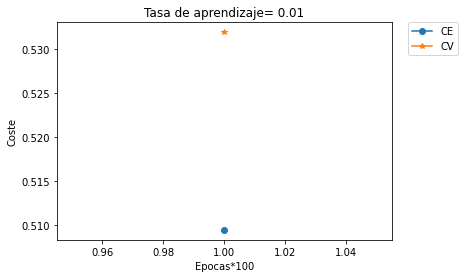

Mejor iteracion es: 108 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 14
Predv    False  True 
Actualv              
0         0.78   0.16
1         0.22   0.84
Accuracy entrenamiento: 0.8400000000000001  y accuracy validación: 0.8
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


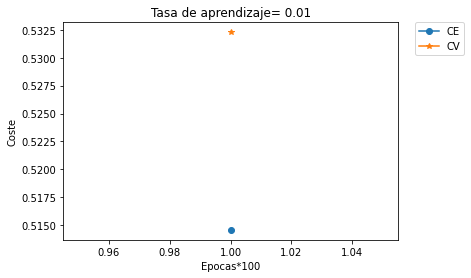

Mejor iteracion es: 114 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 15
Predv      False     True 
Actualv                   
0        0.77551  0.192308
1        0.22449  0.807692
Accuracy entrenamiento: 0.8857142857142858  y accuracy validación: 0.7866666666666666
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


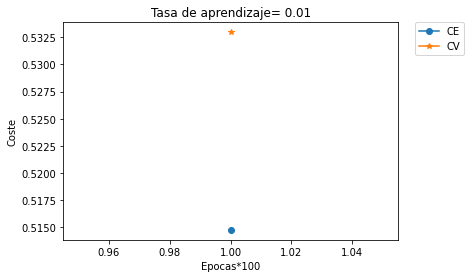

Mejor iteracion es: 113 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 16
Predv       False     True 
Actualv                    
0        0.804348  0.206897
1        0.195652  0.793103
Accuracy entrenamiento: 0.8400000000000001  y accuracy validación: 0.8
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


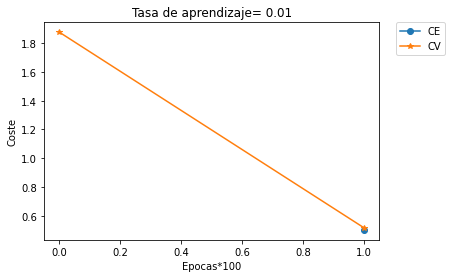

Mejor iteracion es: 100 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 17
Predv    False     True 
Actualv                 
0         0.75  0.173913
1         0.25  0.826087
Accuracy entrenamiento: 0.8342857142857143  y accuracy validación: 0.7733333333333333
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


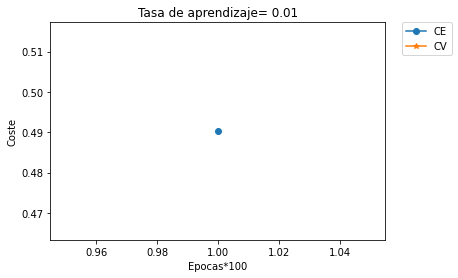

Mejor iteracion es: 94 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 18
Predv       False     True 
Actualv                    
0        0.745098  0.208333
1        0.254902  0.791667
Accuracy entrenamiento: 0.8285714285714287  y accuracy validación: 0.76
Coste tras la iteración 0: 1.678571


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


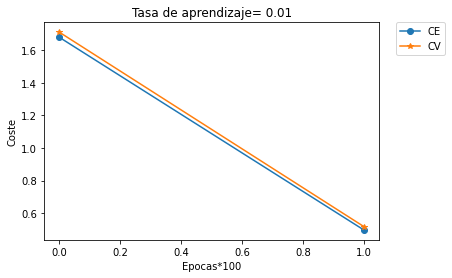

Mejor iteracion es: 100 con la semilla: 99
Número de neuronas: 19
Predv    False  True 
Actualv              
0         0.76    0.2
1         0.24    0.8
Accuracy entrenamiento: 0.8457142857142859  y accuracy validación: 0.7733333333333333
Coste tras la iteración 0: nan


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Coste tras la iteración 1000: nan
Coste tras la iteración 2000: nan


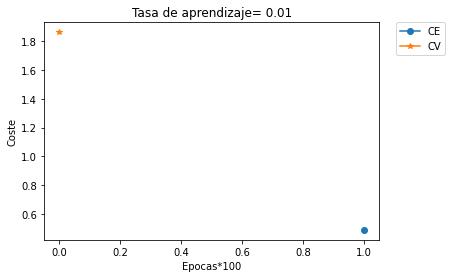

Mejor iteracion es: 97 con la semilla: 99


<ipython-input-25-bcba200444bd>:15: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))


Número de neuronas: 20
Predv       False     True 
Actualv                    
0        0.745098  0.208333
1        0.254902  0.791667
Accuracy entrenamiento: 0.8400000000000001  y accuracy validación: 0.76


FileNotFoundError: [Errno 2] No such file or directory: 'Resultados/frailejon_tanh.txt'

In [71]:
x = PrettyTable(["NNeurons", "Acc_E", "Acc_V", "epoca"])

for i in range(1,21):
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = 3000, tasa = 0.01, semilla = 99, print_c=True, fx_activacion="tanh")
    # nos quedamos con el mejor numero de epocas
    param, epoc = modelo_red2(CE_x, CE_y, CV_x, CV_y, n_h = i, num_iter = (epoc+1), tasa = 0.01, semilla = 99, print_c=False, fx_activacion="tanh")
    
    # predicciones
    pE=pred(param, CE_x, "tanh")
    pV=pred(param, CV_x, "tanh")
    
    # Accuracy
    # entrenamiento
    Acc_e = np.sum((pE == CE_y)/n)
    
    # validacion
    Acc_v = np.sum((pV == CV_y)/m)
    
    #matrices de confusion para train y validacion
    ye_actu = pd.Series(CE_y.ravel(), name='Actuale')
    ye_pred = pd.Series(pE.ravel(), name='Prede')
   
    df_confusione = pd.crosstab(ye_actu, ye_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    yv_actu = pd.Series(CV_y.ravel(), name='Actualv')
    yv_pred = pd.Series(pV.ravel(), name='Predv')
   
    df_confusionv = pd.crosstab(yv_actu, yv_pred).apply(lambda r: r/r.sum(), axis=0) 
    
    print("Número de neuronas: " +str(i))
    print(df_confusionv)
    print("Accuracy entrenamiento: "  + str(Acc_e), " y accuracy validación: " + str(Acc_v) )
    
    x.add_row([i, Acc_e, Acc_v, epoc])
     
mets = x.get_string()

with open('Resultados/frailejon_tanh.txt', 'w') as f:  #guardamos los datos en la carpeta Resultados
    f.write(mets)
    
print(x)

Se observa inestabilidad en la ejecución del modelo, por lo cual se concluye que la función ReLU es la más adecuada dado el comportamiento de la variable de estudio.